In [11]:
%env QHL_NUMPY=jax

import time
import matplotlib.pyplot as plt
from model import *
from data_loader import *
from layers_init import *
from jax.example_libraries.optimizers import adam, adamax

layer_sizes = [4, 2]

params = init_network_params(layer_sizes, random.PRNGKey(0))
step_size = 0.1
num_epochs = 10000
num_it = 1
batch_size = 160
n_targets = 2
kernel_size = 8
kernel_numb = 1
num_quantum = 1
num_conv = 1
kernel = np.random.randn(kernel_numb, kernel_size, kernel_size)
kernel2 = np.random.randn(kernel_numb, int(kernel_size/2), int(kernel_size/2))

theta = jnp.asarray(0.1*np.random.random((num_quantum, 6)))
theta_small = jnp.asarray(0.1*np.random.random((num_quantum, 5)))
theta14 = jnp.asarray(90*np.random.random(24), dtype = int)
print(len(theta))
print(len(params))
params.insert(0, theta_small)
params.insert(0, theta)

loss_history = []
loss_history_train = []
loss_history_test = []
train_accuracy = []
test_accuracy = []
step_size = 0
opt_init, opt_state, get_params = adam(1e-5, b1 = 0.9, b2 = 0.999)
opt_state = opt_init(params)

training_generator, train_images, train_labels, test_images, test_labels = data(batch_size, n_targets)
print(train_labels)
x, y = filter_(train_images, train_labels)
test_images, test_labels = filter_(test_images, test_labels)
test_labels = one_hot(test_labels, n_targets)
for epoch in range(num_epochs):
    start_time = time.time()
    for it in range(num_it):
        yy = one_hot(y, n_targets)
        loss_res, opt_state = update(opt_state, x, yy, step_size, optimizer = adam(1e-5, b1 = 0.9, b2 = 0.999), theta = theta, conv=None)
        loss_history.append(float(loss_res))
        step_size += batch_size

    epoch_time = time.time() - start_time
    params = get_params(opt_state)
    #loss_train = loss(params, train_images, train_labels, theta = None, conv=my_conv)
    loss_test = loss(params, test_images, test_labels, theta = theta, conv=None)
    #loss_history_train.append(float(loss_train))
    loss_history_test.append(float(loss_test))
    train_acc = accuracy(params, x, yy, theta = theta, conv=None)
    test_acc = accuracy(params, test_images, test_labels, theta = theta, conv=None)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    # f.write(f"Epoch {epoch} in {epoch_time} sec" + '\n')
    # f.write(f"Training set accuracy {format(train_acc)} loss {loss_history[-1]}" + '\n')
    # f.write("Test set accuracy {}".format(test_acc))
    print("Epoch {} in {:0.2f} sec".format(epoch, epoch_time))
    print(f"Training set accuracy {format(train_acc)} loss {loss_history[-1]}")
    print("Test set accuracy {}".format(test_acc))
    # print(f'theta = {90*params[0]}')
print(max(test_accuracy))


env: QHL_NUMPY=jax
1
1
[5 0 4 ... 5 6 8]
Epoch 0 in 0.03 sec
Training set accuracy 0.48912420868873596 loss 259.802490234375
Test set accuracy 0.4833836853504181
Epoch 1 in 0.03 sec
Training set accuracy 0.48978084325790405 loss 259.1270751953125
Test set accuracy 0.4833836853504181
Epoch 2 in 0.03 sec
Training set accuracy 0.49068376421928406 loss 258.0216369628906
Test set accuracy 0.482880175113678
Epoch 3 in 0.03 sec
Training set accuracy 0.49134039878845215 loss 256.2752990722656
Test set accuracy 0.4838871955871582
Epoch 4 in 0.03 sec
Training set accuracy 0.492571622133255 loss 254.01773071289062
Test set accuracy 0.4833836853504181
Epoch 5 in 0.03 sec
Training set accuracy 0.49380284547805786 loss 251.35000610351562
Test set accuracy 0.4838871955871582
Epoch 6 in 0.03 sec
Training set accuracy 0.4948699176311493 loss 248.3563690185547
Test set accuracy 0.4838871955871582
Epoch 7 in 0.03 sec
Training set accuracy 0.4962652921676636 loss 245.10928344726562
Test set accuracy 0.484

Epoch 67 in 0.02 sec
Training set accuracy 0.4277271628379822 loss 110.57950592041016
Test set accuracy 0.38418933749198914
Epoch 68 in 0.02 sec
Training set accuracy 0.4277271628379822 loss 109.69102478027344
Test set accuracy 0.382678747177124
Epoch 69 in 0.02 sec
Training set accuracy 0.42657801508903503 loss 108.81800842285156
Test set accuracy 0.38368579745292664
Epoch 70 in 0.02 sec
Training set accuracy 0.42575719952583313 loss 107.96022033691406
Test set accuracy 0.38418933749198914
Epoch 71 in 0.02 sec
Training set accuracy 0.4253467917442322 loss 107.11752319335938
Test set accuracy 0.38368579745292664
Epoch 72 in 0.02 sec
Training set accuracy 0.4245259761810303 loss 106.28804779052734
Test set accuracy 0.3831822872161865
Epoch 73 in 0.02 sec
Training set accuracy 0.4208323061466217 loss 105.47103118896484
Test set accuracy 0.3721047341823578
Epoch 74 in 0.02 sec
Training set accuracy 0.42042189836502075 loss 104.66728210449219
Test set accuracy 0.3716011941432953
Epoch 75 i

Epoch 138 in 0.02 sec
Training set accuracy 0.44028565287590027 loss 66.21183013916016
Test set accuracy 0.3977845013141632
Epoch 139 in 0.02 sec
Training set accuracy 0.4406139850616455 loss 65.73627471923828
Test set accuracy 0.3977845013141632
Epoch 140 in 0.02 sec
Training set accuracy 0.44094231724739075 loss 65.26312255859375
Test set accuracy 0.3977845013141632
Epoch 141 in 0.02 sec
Training set accuracy 0.44176313281059265 loss 64.79236602783203
Test set accuracy 0.3972809612751007
Epoch 142 in 0.02 sec
Training set accuracy 0.4420093595981598 loss 64.32416534423828
Test set accuracy 0.3977845013141632
Epoch 143 in 0.02 sec
Training set accuracy 0.44241976737976074 loss 63.85862731933594
Test set accuracy 0.3977845013141632
Epoch 144 in 0.02 sec
Training set accuracy 0.44332268834114075 loss 63.395530700683594
Test set accuracy 0.3987915515899658
Epoch 145 in 0.02 sec
Training set accuracy 0.4435689151287079 loss 62.9349479675293
Test set accuracy 0.39929506182670593
Epoch 146 

Epoch 204 in 0.02 sec
Training set accuracy 0.4690141975879669 loss 40.48724365234375
Test set accuracy 0.4607250690460205
Epoch 205 in 0.03 sec
Training set accuracy 0.4698350429534912 loss 40.18667984008789
Test set accuracy 0.4622356593608856
Epoch 206 in 0.02 sec
Training set accuracy 0.47082000970840454 loss 39.88859176635742
Test set accuracy 0.46324270963668823
Epoch 207 in 0.02 sec
Training set accuracy 0.47180497646331787 loss 39.59274673461914
Test set accuracy 0.46424975991249084
Epoch 208 in 0.02 sec
Training set accuracy 0.47188708186149597 loss 39.29909133911133
Test set accuracy 0.46576032042503357
Epoch 209 in 0.02 sec
Training set accuracy 0.4730361998081207 loss 39.00758361816406
Test set accuracy 0.46576032042503357
Epoch 210 in 0.02 sec
Training set accuracy 0.4735287129878998 loss 38.71834182739258
Test set accuracy 0.469788521528244
Epoch 211 in 0.02 sec
Training set accuracy 0.4745957553386688 loss 38.431427001953125
Test set accuracy 0.47280967235565186
Epoch 21

Epoch 276 in 0.02 sec
Training set accuracy 0.5815480947494507 loss 25.60198402404785
Test set accuracy 0.5941591262817383
Epoch 277 in 0.02 sec
Training set accuracy 0.5822868347167969 loss 25.460662841796875
Test set accuracy 0.5946626663208008
Epoch 278 in 0.02 sec
Training set accuracy 0.5833538770675659 loss 25.320514678955078
Test set accuracy 0.5986908078193665
Epoch 279 in 0.02 sec
Training set accuracy 0.5841746926307678 loss 25.181503295898438
Test set accuracy 0.6007049083709717
Epoch 280 in 0.02 sec
Training set accuracy 0.5853238105773926 loss 25.043575286865234
Test set accuracy 0.6022155284881592
Epoch 281 in 0.02 sec
Training set accuracy 0.5861446261405945 loss 24.906719207763672
Test set accuracy 0.6042296290397644
Epoch 282 in 0.02 sec
Training set accuracy 0.5872117280960083 loss 24.770998001098633
Test set accuracy 0.6067472100257874
Epoch 283 in 0.02 sec
Training set accuracy 0.5890175104141235 loss 24.636486053466797
Test set accuracy 0.6082578301429749
Epoch 284

Epoch 348 in 0.02 sec
Training set accuracy 0.6414676308631897 loss 18.539045333862305
Test set accuracy 0.6591138243675232
Epoch 349 in 0.02 sec
Training set accuracy 0.6417959332466125 loss 18.47258186340332
Test set accuracy 0.6601208448410034
Epoch 350 in 0.02 sec
Training set accuracy 0.6422884464263916 loss 18.406509399414062
Test set accuracy 0.6606243848800659
Epoch 351 in 0.02 sec
Training set accuracy 0.6430271863937378 loss 18.340816497802734
Test set accuracy 0.6611278653144836
Epoch 352 in 0.02 sec
Training set accuracy 0.6436838507652283 loss 18.2755126953125
Test set accuracy 0.6626384854316711
Epoch 353 in 0.02 sec
Training set accuracy 0.6440942287445068 loss 18.21057891845703
Test set accuracy 0.6631419658660889
Epoch 354 in 0.02 sec
Training set accuracy 0.6449150443077087 loss 18.146013259887695
Test set accuracy 0.6641490459442139
Epoch 355 in 0.02 sec
Training set accuracy 0.6449971199035645 loss 18.081825256347656
Test set accuracy 0.6651560664176941
Epoch 356 in

Epoch 420 in 0.02 sec
Training set accuracy 0.6729869842529297 loss 14.487902641296387
Test set accuracy 0.7004027962684631
Epoch 421 in 0.02 sec
Training set accuracy 0.6733973622322083 loss 14.439875602722168
Test set accuracy 0.7009063363075256
Epoch 422 in 0.02 sec
Training set accuracy 0.6738898754119873 loss 14.392026901245117
Test set accuracy 0.7019134163856506
Epoch 423 in 0.02 sec
Training set accuracy 0.6743002533912659 loss 14.344377517700195
Test set accuracy 0.7019134163856506
Epoch 424 in 0.02 sec
Training set accuracy 0.6752031445503235 loss 14.296904563903809
Test set accuracy 0.7024168968200684
Epoch 425 in 0.02 sec
Training set accuracy 0.6756135821342468 loss 14.249627113342285
Test set accuracy 0.7024168968200684
Epoch 426 in 0.02 sec
Training set accuracy 0.6756135821342468 loss 14.20254135131836
Test set accuracy 0.7024168968200684
Epoch 427 in 0.02 sec
Training set accuracy 0.6755315065383911 loss 14.155637741088867
Test set accuracy 0.7039275169372559
Epoch 428

Epoch 491 in 0.02 sec
Training set accuracy 0.6949848532676697 loss 11.513315200805664
Test set accuracy 0.7210473418235779
Epoch 492 in 0.02 sec
Training set accuracy 0.6952310800552368 loss 11.47732925415039
Test set accuracy 0.7215508818626404
Epoch 493 in 0.02 sec
Training set accuracy 0.6955593824386597 loss 11.441505432128906
Test set accuracy 0.7210473418235779
Epoch 494 in 0.02 sec
Training set accuracy 0.6962160468101501 loss 11.405842781066895
Test set accuracy 0.7210473418235779
Epoch 495 in 0.02 sec
Training set accuracy 0.6967906355857849 loss 11.370327949523926
Test set accuracy 0.7215508818626404
Epoch 496 in 0.02 sec
Training set accuracy 0.6975293755531311 loss 11.334978103637695
Test set accuracy 0.7220543622970581
Epoch 497 in 0.02 sec
Training set accuracy 0.6974472999572754 loss 11.299775123596191
Test set accuracy 0.7220543622970581
Epoch 498 in 0.02 sec
Training set accuracy 0.6976114511489868 loss 11.264719009399414
Test set accuracy 0.7215508818626404
Epoch 499

Epoch 562 in 0.02 sec
Training set accuracy 0.7140277624130249 loss 9.281038284301758
Test set accuracy 0.7286002039909363
Epoch 563 in 0.02 sec
Training set accuracy 0.7140277624130249 loss 9.253652572631836
Test set accuracy 0.7280966639518738
Epoch 564 in 0.03 sec
Training set accuracy 0.714273989200592 loss 9.22636890411377
Test set accuracy 0.7280966639518738
Epoch 565 in 0.02 sec
Training set accuracy 0.7146023511886597 loss 9.19919204711914
Test set accuracy 0.7286002039909363
Epoch 566 in 0.02 sec
Training set accuracy 0.7148485779762268 loss 9.172127723693848
Test set accuracy 0.7286002039909363
Epoch 567 in 0.02 sec
Training set accuracy 0.7149306535720825 loss 9.145162582397461
Test set accuracy 0.7291037440299988
Epoch 568 in 0.02 sec
Training set accuracy 0.7155052423477173 loss 9.118297576904297
Test set accuracy 0.7291037440299988
Epoch 569 in 0.02 sec
Training set accuracy 0.7155052423477173 loss 9.091537475585938
Test set accuracy 0.7296072244644165
Epoch 570 in 0.02 s

Epoch 634 in 0.02 sec
Training set accuracy 0.7274070382118225 loss 7.541497707366943
Test set accuracy 0.7432023882865906
Epoch 635 in 0.02 sec
Training set accuracy 0.7275712490081787 loss 7.520294666290283
Test set accuracy 0.7437059283256531
Epoch 636 in 0.02 sec
Training set accuracy 0.7282278537750244 loss 7.49916410446167
Test set accuracy 0.7437059283256531
Epoch 637 in 0.02 sec
Training set accuracy 0.7281457781791687 loss 7.478108882904053
Test set accuracy 0.7437059283256531
Epoch 638 in 0.02 sec
Training set accuracy 0.7281457781791687 loss 7.457120418548584
Test set accuracy 0.7437059283256531
Epoch 639 in 0.02 sec
Training set accuracy 0.728556215763092 loss 7.436206340789795
Test set accuracy 0.7442094683647156
Epoch 640 in 0.02 sec
Training set accuracy 0.7284741401672363 loss 7.415360450744629
Test set accuracy 0.7442094683647156
Epoch 641 in 0.02 sec
Training set accuracy 0.7287203669548035 loss 7.394591808319092
Test set accuracy 0.7442094683647156
Epoch 642 in 0.02 

Epoch 706 in 0.02 sec
Training set accuracy 0.7420175671577454 loss 6.174063682556152
Test set accuracy 0.7613292932510376
Epoch 707 in 0.02 sec
Training set accuracy 0.7422638535499573 loss 6.1571946144104
Test set accuracy 0.7608257532119751
Epoch 708 in 0.02 sec
Training set accuracy 0.7421817183494568 loss 6.140380382537842
Test set accuracy 0.7613292932510376
Epoch 709 in 0.02 sec
Training set accuracy 0.7421817183494568 loss 6.123629093170166
Test set accuracy 0.7618328332901001
Epoch 710 in 0.02 sec
Training set accuracy 0.742345929145813 loss 6.106932163238525
Test set accuracy 0.7618328332901001
Epoch 711 in 0.02 sec
Training set accuracy 0.7425921559333801 loss 6.090298652648926
Test set accuracy 0.7618328332901001
Epoch 712 in 0.02 sec
Training set accuracy 0.7428383827209473 loss 6.07372522354126
Test set accuracy 0.7613292932510376
Epoch 713 in 0.02 sec
Training set accuracy 0.742920458316803 loss 6.057214736938477
Test set accuracy 0.7618328332901001
Epoch 714 in 0.02 sec

Epoch 777 in 0.02 sec
Training set accuracy 0.7838792204856873 loss 5.1406707763671875
Test set accuracy 0.7945619225502014
Epoch 778 in 0.02 sec
Training set accuracy 0.7843716740608215 loss 5.128567695617676
Test set accuracy 0.7940583825111389
Epoch 779 in 0.02 sec
Training set accuracy 0.785028338432312 loss 5.116530895233154
Test set accuracy 0.7940583825111389
Epoch 780 in 0.02 sec
Training set accuracy 0.7851924896240234 loss 5.104557991027832
Test set accuracy 0.7940583825111389
Epoch 781 in 0.02 sec
Training set accuracy 0.7852745652198792 loss 5.092652320861816
Test set accuracy 0.7940583825111389
Epoch 782 in 0.02 sec
Training set accuracy 0.7851924896240234 loss 5.080810546875
Test set accuracy 0.7940583825111389
Epoch 783 in 0.03 sec
Training set accuracy 0.7855208516120911 loss 5.069031238555908
Test set accuracy 0.7945619225502014
Epoch 784 in 0.02 sec
Training set accuracy 0.7856029272079468 loss 5.057318210601807
Test set accuracy 0.7945619225502014
Epoch 785 in 0.02 s

Epoch 847 in 0.03 sec
Training set accuracy 0.8002955317497253 loss 4.445919990539551
Test set accuracy 0.7985901236534119
Epoch 848 in 0.02 sec
Training set accuracy 0.8002955317497253 loss 4.43755578994751
Test set accuracy 0.7985901236534119
Epoch 849 in 0.02 sec
Training set accuracy 0.8002955317497253 loss 4.429218769073486
Test set accuracy 0.7985901236534119
Epoch 850 in 0.03 sec
Training set accuracy 0.8002134561538696 loss 4.420905590057373
Test set accuracy 0.7990936636924744
Epoch 851 in 0.02 sec
Training set accuracy 0.8002134561538696 loss 4.4126176834106445
Test set accuracy 0.7990936636924744
Epoch 852 in 0.02 sec
Training set accuracy 0.8004596829414368 loss 4.404356956481934
Test set accuracy 0.8001006841659546
Epoch 853 in 0.02 sec
Training set accuracy 0.8006238341331482 loss 4.396117210388184
Test set accuracy 0.8001006841659546
Epoch 854 in 0.02 sec
Training set accuracy 0.8006238341331482 loss 4.38790225982666
Test set accuracy 0.8001006841659546
Epoch 855 in 0.02

Epoch 919 in 0.02 sec
Training set accuracy 0.8068620562553406 loss 3.900508165359497
Test set accuracy 0.8046324253082275
Epoch 920 in 0.02 sec
Training set accuracy 0.8068620562553406 loss 3.8936595916748047
Test set accuracy 0.8046324253082275
Epoch 921 in 0.02 sec
Training set accuracy 0.8071082830429077 loss 3.886826515197754
Test set accuracy 0.8046324253082275
Epoch 922 in 0.02 sec
Training set accuracy 0.807026207447052 loss 3.880009651184082
Test set accuracy 0.80513596534729
Epoch 923 in 0.03 sec
Training set accuracy 0.807026207447052 loss 3.873208522796631
Test set accuracy 0.80513596534729
Epoch 924 in 0.02 sec
Training set accuracy 0.8071082830429077 loss 3.866421937942505
Test set accuracy 0.80513596534729
Epoch 925 in 0.02 sec
Training set accuracy 0.8072724342346191 loss 3.8596508502960205
Test set accuracy 0.8056395053863525
Epoch 926 in 0.02 sec
Training set accuracy 0.8072724342346191 loss 3.852893114089966
Test set accuracy 0.8056395053863525
Epoch 927 in 0.02 sec


Epoch 990 in 0.02 sec
Training set accuracy 0.8108840584754944 loss 3.445899724960327
Test set accuracy 0.8106747269630432
Epoch 991 in 0.02 sec
Training set accuracy 0.8111302852630615 loss 3.4399051666259766
Test set accuracy 0.8106747269630432
Epoch 992 in 0.02 sec
Training set accuracy 0.8110482096672058 loss 3.43392276763916
Test set accuracy 0.8106747269630432
Epoch 993 in 0.02 sec
Training set accuracy 0.8111302852630615 loss 3.4279520511627197
Test set accuracy 0.8106747269630432
Epoch 994 in 0.02 sec
Training set accuracy 0.8113765120506287 loss 3.4219937324523926
Test set accuracy 0.8106747269630432
Epoch 995 in 0.02 sec
Training set accuracy 0.8116227984428406 loss 3.416043996810913
Test set accuracy 0.8106747269630432
Epoch 996 in 0.03 sec
Training set accuracy 0.8115406632423401 loss 3.4101064205169678
Test set accuracy 0.8111782670021057
Epoch 997 in 0.02 sec
Training set accuracy 0.8114585876464844 loss 3.404179096221924
Test set accuracy 0.8111782670021057
Epoch 998 in 

Epoch 1057 in 0.05 sec
Training set accuracy 0.8149881362915039 loss 3.0666322708129883
Test set accuracy 0.8197381496429443
Epoch 1058 in 0.05 sec
Training set accuracy 0.8151522874832153 loss 3.0612854957580566
Test set accuracy 0.8197381496429443
Epoch 1059 in 0.05 sec
Training set accuracy 0.815234363079071 loss 3.055948257446289
Test set accuracy 0.8197381496429443
Epoch 1060 in 0.05 sec
Training set accuracy 0.815234363079071 loss 3.050619125366211
Test set accuracy 0.8202416896820068
Epoch 1061 in 0.05 sec
Training set accuracy 0.8151522874832153 loss 3.045299530029297
Test set accuracy 0.8202416896820068
Epoch 1062 in 0.05 sec
Training set accuracy 0.8151522874832153 loss 3.039990186691284
Test set accuracy 0.8202416896820068
Epoch 1063 in 0.05 sec
Training set accuracy 0.815234363079071 loss 3.0346908569335938
Test set accuracy 0.8197381496429443
Epoch 1064 in 0.05 sec
Training set accuracy 0.8153164386749268 loss 3.029400110244751
Test set accuracy 0.8197381496429443
Epoch 10

Epoch 1125 in 0.04 sec
Training set accuracy 0.8201592564582825 loss 2.726243495941162
Test set accuracy 0.8217522501945496
Epoch 1126 in 0.05 sec
Training set accuracy 0.8203234076499939 loss 2.7215967178344727
Test set accuracy 0.8217522501945496
Epoch 1127 in 0.05 sec
Training set accuracy 0.8204875588417053 loss 2.716961622238159
Test set accuracy 0.8217522501945496
Epoch 1128 in 0.04 sec
Training set accuracy 0.8207338452339172 loss 2.712336540222168
Test set accuracy 0.8217522501945496
Epoch 1129 in 0.05 sec
Training set accuracy 0.8207338452339172 loss 2.7077226638793945
Test set accuracy 0.8217522501945496
Epoch 1130 in 0.05 sec
Training set accuracy 0.8209800720214844 loss 2.703120231628418
Test set accuracy 0.8222557902336121
Epoch 1131 in 0.04 sec
Training set accuracy 0.8209800720214844 loss 2.6985297203063965
Test set accuracy 0.8217522501945496
Epoch 1132 in 0.04 sec
Training set accuracy 0.8210621476173401 loss 2.693948984146118
Test set accuracy 0.8217522501945496
Epoch

Epoch 1193 in 0.05 sec
Training set accuracy 0.8305015563964844 loss 2.4327759742736816
Test set accuracy 0.829305112361908
Epoch 1194 in 0.05 sec
Training set accuracy 0.8304194808006287 loss 2.4287660121917725
Test set accuracy 0.829305112361908
Epoch 1195 in 0.05 sec
Training set accuracy 0.8304194808006287 loss 2.4247665405273438
Test set accuracy 0.829305112361908
Epoch 1196 in 0.05 sec
Training set accuracy 0.8305015563964844 loss 2.4207732677459717
Test set accuracy 0.829305112361908
Epoch 1197 in 0.05 sec
Training set accuracy 0.8305836319923401 loss 2.4167885780334473
Test set accuracy 0.829305112361908
Epoch 1198 in 0.05 sec
Training set accuracy 0.8305836319923401 loss 2.4128119945526123
Test set accuracy 0.829305112361908
Epoch 1199 in 0.04 sec
Training set accuracy 0.8306657075881958 loss 2.408843994140625
Test set accuracy 0.829305112361908
Epoch 1200 in 0.04 sec
Training set accuracy 0.8307477831840515 loss 2.4048829078674316
Test set accuracy 0.829305112361908
Epoch 120

Epoch 1261 in 0.05 sec
Training set accuracy 0.8349339365959167 loss 2.1776227951049805
Test set accuracy 0.8333333134651184
Epoch 1262 in 0.05 sec
Training set accuracy 0.8350160121917725 loss 2.1741087436676025
Test set accuracy 0.8333333134651184
Epoch 1263 in 0.05 sec
Training set accuracy 0.8351801633834839 loss 2.1706016063690186
Test set accuracy 0.8328298330307007
Epoch 1264 in 0.05 sec
Training set accuracy 0.8352622985839844 loss 2.1671011447906494
Test set accuracy 0.8328298330307007
Epoch 1265 in 0.05 sec
Training set accuracy 0.8352622985839844 loss 2.1636083126068115
Test set accuracy 0.8328298330307007
Epoch 1266 in 0.05 sec
Training set accuracy 0.8352622985839844 loss 2.1601216793060303
Test set accuracy 0.8328298330307007
Epoch 1267 in 0.17 sec
Training set accuracy 0.8355085253715515 loss 2.1566410064697266
Test set accuracy 0.8333333134651184
Epoch 1268 in 0.05 sec
Training set accuracy 0.8355906009674072 loss 2.1531684398651123
Test set accuracy 0.8338368535041809


Epoch 1327 in 0.05 sec
Training set accuracy 0.8410900831222534 loss 1.9606693983078003
Test set accuracy 0.8358509540557861
Epoch 1328 in 0.04 sec
Training set accuracy 0.8413363099098206 loss 1.9576056003570557
Test set accuracy 0.8358509540557861
Epoch 1329 in 0.05 sec
Training set accuracy 0.8414183855056763 loss 1.9545480012893677
Test set accuracy 0.8358509540557861
Epoch 1330 in 0.05 sec
Training set accuracy 0.8416646122932434 loss 1.9514967203140259
Test set accuracy 0.8358509540557861
Epoch 1331 in 0.05 sec
Training set accuracy 0.8417467474937439 loss 1.9484502077102661
Test set accuracy 0.8363544940948486
Epoch 1332 in 0.04 sec
Training set accuracy 0.8417467474937439 loss 1.9454104900360107
Test set accuracy 0.8363544940948486
Epoch 1333 in 0.05 sec
Training set accuracy 0.8418288230895996 loss 1.9423762559890747
Test set accuracy 0.8368580341339111
Epoch 1334 in 0.04 sec
Training set accuracy 0.8418288230895996 loss 1.9393473863601685
Test set accuracy 0.8368580341339111


Epoch 1395 in 0.05 sec
Training set accuracy 0.8465895056724548 loss 1.764397144317627
Test set accuracy 0.8413897156715393
Epoch 1396 in 0.05 sec
Training set accuracy 0.8466716408729553 loss 1.7616854906082153
Test set accuracy 0.8418932557106018
Epoch 1397 in 0.05 sec
Training set accuracy 0.846753716468811 loss 1.7589783668518066
Test set accuracy 0.8423967957496643
Epoch 1398 in 0.05 sec
Training set accuracy 0.8469178676605225 loss 1.756277084350586
Test set accuracy 0.8418932557106018
Epoch 1399 in 0.05 sec
Training set accuracy 0.8469178676605225 loss 1.7535805702209473
Test set accuracy 0.8418932557106018
Epoch 1400 in 0.05 sec
Training set accuracy 0.8469999432563782 loss 1.7508878707885742
Test set accuracy 0.8423967957496643
Epoch 1401 in 0.05 sec
Training set accuracy 0.8469999432563782 loss 1.7482019662857056
Test set accuracy 0.8423967957496643
Epoch 1402 in 0.05 sec
Training set accuracy 0.8469999432563782 loss 1.7455209493637085
Test set accuracy 0.8423967957496643
Epo

Epoch 1463 in 0.05 sec
Training set accuracy 0.8529098033905029 loss 1.592046856880188
Test set accuracy 0.84843909740448
Epoch 1464 in 0.05 sec
Training set accuracy 0.8532381653785706 loss 1.589677095413208
Test set accuracy 0.84843909740448
Epoch 1465 in 0.05 sec
Training set accuracy 0.8533202409744263 loss 1.5873122215270996
Test set accuracy 0.8499496579170227
Epoch 1466 in 0.04 sec
Training set accuracy 0.8535664677619934 loss 1.5849512815475464
Test set accuracy 0.8499496579170227
Epoch 1467 in 0.05 sec
Training set accuracy 0.8536485433578491 loss 1.5825955867767334
Test set accuracy 0.8499496579170227
Epoch 1468 in 0.05 sec
Training set accuracy 0.8538126945495605 loss 1.5802433490753174
Test set accuracy 0.8504531979560852
Epoch 1469 in 0.04 sec
Training set accuracy 0.853976845741272 loss 1.5778955221176147
Test set accuracy 0.8504531979560852
Epoch 1470 in 0.04 sec
Training set accuracy 0.8541410565376282 loss 1.575551152229309
Test set accuracy 0.8504531979560852
Epoch 14

Epoch 1530 in 0.05 sec
Training set accuracy 0.8606255054473877 loss 1.442808747291565
Test set accuracy 0.8544813394546509
Epoch 1531 in 0.05 sec
Training set accuracy 0.8608717322349548 loss 1.4407286643981934
Test set accuracy 0.8544813394546509
Epoch 1532 in 0.05 sec
Training set accuracy 0.861117959022522 loss 1.438651442527771
Test set accuracy 0.8544813394546509
Epoch 1533 in 0.05 sec
Training set accuracy 0.8612000346183777 loss 1.4365798234939575
Test set accuracy 0.8544813394546509
Epoch 1534 in 0.05 sec
Training set accuracy 0.8612000346183777 loss 1.4345120191574097
Test set accuracy 0.8544813394546509
Epoch 1535 in 0.05 sec
Training set accuracy 0.8613642454147339 loss 1.4324488639831543
Test set accuracy 0.8544813394546509
Epoch 1536 in 0.04 sec
Training set accuracy 0.8614463210105896 loss 1.4303888082504272
Test set accuracy 0.8544813394546509
Epoch 1537 in 0.05 sec
Training set accuracy 0.8614463210105896 loss 1.4283338785171509
Test set accuracy 0.8544813394546509
Epo

Epoch 1598 in 0.05 sec
Training set accuracy 0.866945743560791 loss 1.3112430572509766
Test set accuracy 0.8605236411094666
Epoch 1599 in 0.05 sec
Training set accuracy 0.866945743560791 loss 1.309468388557434
Test set accuracy 0.8605236411094666
Epoch 1600 in 0.05 sec
Training set accuracy 0.8671099543571472 loss 1.3076984882354736
Test set accuracy 0.861027181148529
Epoch 1601 in 0.05 sec
Training set accuracy 0.8671920299530029 loss 1.3059322834014893
Test set accuracy 0.861027181148529
Epoch 1602 in 0.05 sec
Training set accuracy 0.8675203323364258 loss 1.3041709661483765
Test set accuracy 0.861027181148529
Epoch 1603 in 0.05 sec
Training set accuracy 0.8676844835281372 loss 1.3024150133132935
Test set accuracy 0.861027181148529
Epoch 1604 in 0.04 sec
Training set accuracy 0.8677665591239929 loss 1.3006643056869507
Test set accuracy 0.8615307211875916
Epoch 1605 in 0.05 sec
Training set accuracy 0.8680128455162048 loss 1.2989178895950317
Test set accuracy 0.8615307211875916
Epoch 1

Epoch 1666 in 0.05 sec
Training set accuracy 0.8738406300544739 loss 1.2000088691711426
Test set accuracy 0.8695871233940125
Epoch 1667 in 0.05 sec
Training set accuracy 0.8740047812461853 loss 1.1984883546829224
Test set accuracy 0.8695871233940125
Epoch 1668 in 0.05 sec
Training set accuracy 0.8739227056503296 loss 1.196969985961914
Test set accuracy 0.8700906038284302
Epoch 1669 in 0.05 sec
Training set accuracy 0.8738406300544739 loss 1.195454478263855
Test set accuracy 0.8700906038284302
Epoch 1670 in 0.05 sec
Training set accuracy 0.8740047812461853 loss 1.1939414739608765
Test set accuracy 0.8700906038284302
Epoch 1671 in 0.05 sec
Training set accuracy 0.8740047812461853 loss 1.1924312114715576
Test set accuracy 0.8700906038284302
Epoch 1672 in 0.05 sec
Training set accuracy 0.8740047812461853 loss 1.1909232139587402
Test set accuracy 0.8695871233940125
Epoch 1673 in 0.05 sec
Training set accuracy 0.874086856842041 loss 1.1894179582595825
Test set accuracy 0.8695871233940125
Epo

Epoch 1734 in 0.05 sec
Training set accuracy 0.8763851523399353 loss 1.1015725135803223
Test set accuracy 0.8721047043800354
Epoch 1735 in 0.05 sec
Training set accuracy 0.876467227935791 loss 1.1001932621002197
Test set accuracy 0.8721047043800354
Epoch 1736 in 0.05 sec
Training set accuracy 0.8765493035316467 loss 1.098816990852356
Test set accuracy 0.8721047043800354
Epoch 1737 in 0.05 sec
Training set accuracy 0.8765493035316467 loss 1.0974417924880981
Test set accuracy 0.8726082444190979
Epoch 1738 in 0.05 sec
Training set accuracy 0.8765493035316467 loss 1.0960686206817627
Test set accuracy 0.8726082444190979
Epoch 1739 in 0.05 sec
Training set accuracy 0.8765493035316467 loss 1.0946968793869019
Test set accuracy 0.8726082444190979
Epoch 1740 in 0.05 sec
Training set accuracy 0.8766313791275024 loss 1.0933274030685425
Test set accuracy 0.8726082444190979
Epoch 1741 in 0.04 sec
Training set accuracy 0.8766313791275024 loss 1.0919592380523682
Test set accuracy 0.8726082444190979
Ep

Epoch 1802 in 0.05 sec
Training set accuracy 0.8793401122093201 loss 1.012251615524292
Test set accuracy 0.8751258850097656
Epoch 1803 in 0.05 sec
Training set accuracy 0.8794221878051758 loss 1.011006474494934
Test set accuracy 0.8751258850097656
Epoch 1804 in 0.04 sec
Training set accuracy 0.8795042634010315 loss 1.0097626447677612
Test set accuracy 0.8751258850097656
Epoch 1805 in 0.04 sec
Training set accuracy 0.8795863389968872 loss 1.0085214376449585
Test set accuracy 0.8756294250488281
Epoch 1806 in 0.05 sec
Training set accuracy 0.8795863389968872 loss 1.0072822570800781
Test set accuracy 0.8756294250488281
Epoch 1807 in 0.04 sec
Training set accuracy 0.8795863389968872 loss 1.0060445070266724
Test set accuracy 0.8756294250488281
Epoch 1808 in 0.04 sec
Training set accuracy 0.8797504901885986 loss 1.0048091411590576
Test set accuracy 0.8756294250488281
Epoch 1809 in 0.05 sec
Training set accuracy 0.8798325657844543 loss 1.0035759210586548
Test set accuracy 0.8756294250488281
Ep

Epoch 1870 in 0.05 sec
Training set accuracy 0.8818025588989258 loss 0.9319220185279846
Test set accuracy 0.8821752071380615
Epoch 1871 in 0.05 sec
Training set accuracy 0.8817204236984253 loss 0.9308031797409058
Test set accuracy 0.8821752071380615
Epoch 1872 in 0.04 sec
Training set accuracy 0.8818025588989258 loss 0.929686427116394
Test set accuracy 0.8816717267036438
Epoch 1873 in 0.04 sec
Training set accuracy 0.8818025588989258 loss 0.9285711050033569
Test set accuracy 0.8816717267036438
Epoch 1874 in 0.05 sec
Training set accuracy 0.8818025588989258 loss 0.9274575114250183
Test set accuracy 0.8816717267036438
Epoch 1875 in 0.05 sec
Training set accuracy 0.8818025588989258 loss 0.9263458847999573
Test set accuracy 0.8816717267036438
Epoch 1876 in 0.05 sec
Training set accuracy 0.8818025588989258 loss 0.9252355694770813
Test set accuracy 0.8816717267036438
Epoch 1877 in 0.05 sec
Training set accuracy 0.8818025588989258 loss 0.9241271615028381
Test set accuracy 0.8816717267036438
E

Epoch 1938 in 0.05 sec
Training set accuracy 0.8837724924087524 loss 0.8594778776168823
Test set accuracy 0.8851963877677917
Epoch 1939 in 0.05 sec
Training set accuracy 0.8838545680046082 loss 0.8584641218185425
Test set accuracy 0.8851963877677917
Epoch 1940 in 0.05 sec
Training set accuracy 0.8839366436004639 loss 0.8574513792991638
Test set accuracy 0.8851963877677917
Epoch 1941 in 0.04 sec
Training set accuracy 0.8839366436004639 loss 0.8564401268959045
Test set accuracy 0.8851963877677917
Epoch 1942 in 0.05 sec
Training set accuracy 0.8840187191963196 loss 0.8554301261901855
Test set accuracy 0.8851963877677917
Epoch 1943 in 0.05 sec
Training set accuracy 0.8840187191963196 loss 0.8544211387634277
Test set accuracy 0.8851963877677917
Epoch 1944 in 0.05 sec
Training set accuracy 0.8841007947921753 loss 0.8534139394760132
Test set accuracy 0.8846928477287292
Epoch 1945 in 0.05 sec
Training set accuracy 0.8841007947921753 loss 0.8524078726768494
Test set accuracy 0.8846928477287292


Epoch 2006 in 0.05 sec
Training set accuracy 0.885988712310791 loss 0.7933726906776428
Test set accuracy 0.8856999278068542
Epoch 2007 in 0.05 sec
Training set accuracy 0.8860707879066467 loss 0.7924403548240662
Test set accuracy 0.8856999278068542
Epoch 2008 in 0.05 sec
Training set accuracy 0.8860707879066467 loss 0.7915095686912537
Test set accuracy 0.8856999278068542
Epoch 2009 in 0.05 sec
Training set accuracy 0.8860707879066467 loss 0.7905794382095337
Test set accuracy 0.8856999278068542
Epoch 2010 in 0.05 sec
Training set accuracy 0.8861528635025024 loss 0.7896503210067749
Test set accuracy 0.8856999278068542
Epoch 2011 in 0.05 sec
Training set accuracy 0.8861528635025024 loss 0.7887216806411743
Test set accuracy 0.886203408241272
Epoch 2012 in 0.04 sec
Training set accuracy 0.8862349390983582 loss 0.787794291973114
Test set accuracy 0.886203408241272
Epoch 2013 in 0.05 sec
Training set accuracy 0.8862349390983582 loss 0.7868678569793701
Test set accuracy 0.886203408241272
Epoch

Epoch 2074 in 0.05 sec
Training set accuracy 0.8876303434371948 loss 0.7322251796722412
Test set accuracy 0.8877139687538147
Epoch 2075 in 0.05 sec
Training set accuracy 0.8876303434371948 loss 0.7313578128814697
Test set accuracy 0.8877139687538147
Epoch 2076 in 0.04 sec
Training set accuracy 0.8875482678413391 loss 0.7304915189743042
Test set accuracy 0.8877139687538147
Epoch 2077 in 0.04 sec
Training set accuracy 0.8874661922454834 loss 0.7296252846717834
Test set accuracy 0.8877139687538147
Epoch 2078 in 0.05 sec
Training set accuracy 0.8874661922454834 loss 0.7287606000900269
Test set accuracy 0.8877139687538147
Epoch 2079 in 0.05 sec
Training set accuracy 0.8874661922454834 loss 0.7278971672058105
Test set accuracy 0.8877139687538147
Epoch 2080 in 0.05 sec
Training set accuracy 0.8875482678413391 loss 0.727034330368042
Test set accuracy 0.8877139687538147
Epoch 2081 in 0.04 sec
Training set accuracy 0.8876303434371948 loss 0.7261724472045898
Test set accuracy 0.8877139687538147
E

Epoch 2142 in 0.05 sec
Training set accuracy 0.8886153101921082 loss 0.6751750111579895
Test set accuracy 0.8892245888710022
Epoch 2143 in 0.05 sec
Training set accuracy 0.8886153101921082 loss 0.6743647456169128
Test set accuracy 0.8892245888710022
Epoch 2144 in 0.05 sec
Training set accuracy 0.8886973857879639 loss 0.6735541820526123
Test set accuracy 0.8892245888710022
Epoch 2145 in 0.05 sec
Training set accuracy 0.8886973857879639 loss 0.6727451086044312
Test set accuracy 0.8892245888710022
Epoch 2146 in 0.05 sec
Training set accuracy 0.8886973857879639 loss 0.671936571598053
Test set accuracy 0.8892245888710022
Epoch 2147 in 0.05 sec
Training set accuracy 0.8886973857879639 loss 0.6711288094520569
Test set accuracy 0.8892245888710022
Epoch 2148 in 0.05 sec
Training set accuracy 0.888943612575531 loss 0.6703219413757324
Test set accuracy 0.8892245888710022
Epoch 2149 in 0.05 sec
Training set accuracy 0.888943612575531 loss 0.669516384601593
Test set accuracy 0.8892245888710022
Epoc

Epoch 2210 in 0.05 sec
Training set accuracy 0.8896823525428772 loss 0.6218305230140686
Test set accuracy 0.8887210488319397
Epoch 2211 in 0.05 sec
Training set accuracy 0.8897644281387329 loss 0.6210725903511047
Test set accuracy 0.8887210488319397
Epoch 2212 in 0.04 sec
Training set accuracy 0.8897644281387329 loss 0.6203153729438782
Test set accuracy 0.8887210488319397
Epoch 2213 in 0.05 sec
Training set accuracy 0.8897644281387329 loss 0.6195594668388367
Test set accuracy 0.8887210488319397
Epoch 2214 in 0.05 sec
Training set accuracy 0.8896002769470215 loss 0.6188037991523743
Test set accuracy 0.8887210488319397
Epoch 2215 in 0.05 sec
Training set accuracy 0.8896823525428772 loss 0.6180486679077148
Test set accuracy 0.8887210488319397
Epoch 2216 in 0.05 sec
Training set accuracy 0.8897644281387329 loss 0.6172947883605957
Test set accuracy 0.8887210488319397
Epoch 2217 in 0.05 sec
Training set accuracy 0.8897644281387329 loss 0.6165409684181213
Test set accuracy 0.8887210488319397


Epoch 2278 in 0.05 sec
Training set accuracy 0.8917344212532043 loss 0.5720009803771973
Test set accuracy 0.8902316093444824
Epoch 2279 in 0.05 sec
Training set accuracy 0.8918985724449158 loss 0.5712937116622925
Test set accuracy 0.8902316093444824
Epoch 2280 in 0.05 sec
Training set accuracy 0.8919806480407715 loss 0.5705870985984802
Test set accuracy 0.8902316093444824
Epoch 2281 in 0.05 sec
Training set accuracy 0.8919806480407715 loss 0.5698810815811157
Test set accuracy 0.8902316093444824
Epoch 2282 in 0.05 sec
Training set accuracy 0.8920627236366272 loss 0.5691757798194885
Test set accuracy 0.8902316093444824
Epoch 2283 in 0.05 sec
Training set accuracy 0.8920627236366272 loss 0.5684716105461121
Test set accuracy 0.8902316093444824
Epoch 2284 in 0.05 sec
Training set accuracy 0.8920627236366272 loss 0.5677677989006042
Test set accuracy 0.8902316093444824
Epoch 2285 in 0.05 sec
Training set accuracy 0.8921447992324829 loss 0.5670650005340576
Test set accuracy 0.8902316093444824


Epoch 2346 in 0.05 sec
Training set accuracy 0.8937864303588867 loss 0.5255417227745056
Test set accuracy 0.8932527899742126
Epoch 2347 in 0.05 sec
Training set accuracy 0.8937864303588867 loss 0.5248829126358032
Test set accuracy 0.8932527899742126
Epoch 2348 in 0.05 sec
Training set accuracy 0.8939505815505981 loss 0.5242247581481934
Test set accuracy 0.8932527899742126
Epoch 2349 in 0.05 sec
Training set accuracy 0.8939505815505981 loss 0.523567259311676
Test set accuracy 0.8932527899742126
Epoch 2350 in 0.05 sec
Training set accuracy 0.8939505815505981 loss 0.5229105353355408
Test set accuracy 0.8932527899742126
Epoch 2351 in 0.05 sec
Training set accuracy 0.8937864303588867 loss 0.5222545862197876
Test set accuracy 0.8932527899742126
Epoch 2352 in 0.05 sec
Training set accuracy 0.893704354763031 loss 0.521599531173706
Test set accuracy 0.8932527899742126
Epoch 2353 in 0.05 sec
Training set accuracy 0.8936222791671753 loss 0.5209450721740723
Test set accuracy 0.8932527899742126
Epo

Epoch 2414 in 0.06 sec
Training set accuracy 0.897972583770752 loss 0.48231416940689087
Test set accuracy 0.8962739109992981
Epoch 2415 in 0.05 sec
Training set accuracy 0.897972583770752 loss 0.4817017614841461
Test set accuracy 0.8962739109992981
Epoch 2416 in 0.04 sec
Training set accuracy 0.8978905081748962 loss 0.4810895323753357
Test set accuracy 0.8962739109992981
Epoch 2417 in 0.05 sec
Training set accuracy 0.8978905081748962 loss 0.4804789423942566
Test set accuracy 0.8962739109992981
Epoch 2418 in 0.05 sec
Training set accuracy 0.8978905081748962 loss 0.47986894845962524
Test set accuracy 0.8962739109992981
Epoch 2419 in 0.05 sec
Training set accuracy 0.8978905081748962 loss 0.4792594313621521
Test set accuracy 0.8962739109992981
Epoch 2420 in 0.04 sec
Training set accuracy 0.8978905081748962 loss 0.4786505401134491
Test set accuracy 0.8962739109992981
Epoch 2421 in 0.05 sec
Training set accuracy 0.8978905081748962 loss 0.4780418276786804
Test set accuracy 0.8962739109992981


Epoch 2482 in 0.05 sec
Training set accuracy 0.897398054599762 loss 0.442178875207901
Test set accuracy 0.8962739109992981
Epoch 2483 in 0.05 sec
Training set accuracy 0.8974801301956177 loss 0.44161105155944824
Test set accuracy 0.8962739109992981
Epoch 2484 in 0.05 sec
Training set accuracy 0.8974801301956177 loss 0.441044420003891
Test set accuracy 0.8962739109992981
Epoch 2485 in 0.05 sec
Training set accuracy 0.8973159790039062 loss 0.44047811627388
Test set accuracy 0.8962739109992981
Epoch 2486 in 0.05 sec
Training set accuracy 0.8973159790039062 loss 0.43991199135780334
Test set accuracy 0.8962739109992981
Epoch 2487 in 0.05 sec
Training set accuracy 0.8973159790039062 loss 0.4393468499183655
Test set accuracy 0.8962739109992981
Epoch 2488 in 0.05 sec
Training set accuracy 0.8973159790039062 loss 0.43878173828125
Test set accuracy 0.8962739109992981
Epoch 2489 in 0.05 sec
Training set accuracy 0.8973159790039062 loss 0.43821775913238525
Test set accuracy 0.8957703709602356
Epoc

Epoch 2550 in 0.05 sec
Training set accuracy 0.8977263569831848 loss 0.40500468015670776
Test set accuracy 0.8947633504867554
Epoch 2551 in 0.05 sec
Training set accuracy 0.8976442813873291 loss 0.40447932481765747
Test set accuracy 0.8942598104476929
Epoch 2552 in 0.04 sec
Training set accuracy 0.8976442813873291 loss 0.40395498275756836
Test set accuracy 0.8942598104476929
Epoch 2553 in 0.05 sec
Training set accuracy 0.8976442813873291 loss 0.40343067049980164
Test set accuracy 0.8942598104476929
Epoch 2554 in 0.05 sec
Training set accuracy 0.8976442813873291 loss 0.40290743112564087
Test set accuracy 0.8942598104476929
Epoch 2555 in 0.05 sec
Training set accuracy 0.8976442813873291 loss 0.40238428115844727
Test set accuracy 0.8942598104476929
Epoch 2556 in 0.05 sec
Training set accuracy 0.8977263569831848 loss 0.40186265110969543
Test set accuracy 0.8942598104476929
Epoch 2557 in 0.05 sec
Training set accuracy 0.8977263569831848 loss 0.40134093165397644
Test set accuracy 0.894763350

Epoch 2618 in 0.05 sec
Training set accuracy 0.8974801301956177 loss 0.3706631064414978
Test set accuracy 0.8937562704086304
Epoch 2619 in 0.05 sec
Training set accuracy 0.8975622057914734 loss 0.3701781928539276
Test set accuracy 0.8937562704086304
Epoch 2620 in 0.05 sec
Training set accuracy 0.8975622057914734 loss 0.3696945309638977
Test set accuracy 0.8937562704086304
Epoch 2621 in 0.05 sec
Training set accuracy 0.8975622057914734 loss 0.36921125650405884
Test set accuracy 0.8937562704086304
Epoch 2622 in 0.05 sec
Training set accuracy 0.8976442813873291 loss 0.36872848868370056
Test set accuracy 0.8942598104476929
Epoch 2623 in 0.05 sec
Training set accuracy 0.8976442813873291 loss 0.3682466745376587
Test set accuracy 0.8942598104476929
Epoch 2624 in 0.05 sec
Training set accuracy 0.8976442813873291 loss 0.36776503920555115
Test set accuracy 0.8942598104476929
Epoch 2625 in 0.05 sec
Training set accuracy 0.8976442813873291 loss 0.3672838509082794
Test set accuracy 0.89425981044769

Epoch 2686 in 0.05 sec
Training set accuracy 0.8980547189712524 loss 0.33903059363365173
Test set accuracy 0.8942598104476929
Epoch 2687 in 0.05 sec
Training set accuracy 0.8980547189712524 loss 0.3385849595069885
Test set accuracy 0.8942598104476929
Epoch 2688 in 0.05 sec
Training set accuracy 0.8981367945671082 loss 0.33813992142677307
Test set accuracy 0.8942598104476929
Epoch 2689 in 0.05 sec
Training set accuracy 0.8981367945671082 loss 0.3376953601837158
Test set accuracy 0.8942598104476929
Epoch 2690 in 0.05 sec
Training set accuracy 0.8981367945671082 loss 0.33725136518478394
Test set accuracy 0.8942598104476929
Epoch 2691 in 0.05 sec
Training set accuracy 0.8981367945671082 loss 0.3368077874183655
Test set accuracy 0.8942598104476929
Epoch 2692 in 0.04 sec
Training set accuracy 0.8981367945671082 loss 0.3363652229309082
Test set accuracy 0.8942598104476929
Epoch 2693 in 0.04 sec
Training set accuracy 0.8981367945671082 loss 0.33592307567596436
Test set accuracy 0.8942598104476

Epoch 2754 in 0.05 sec
Training set accuracy 0.8994500637054443 loss 0.30998992919921875
Test set accuracy 0.8937562704086304
Epoch 2755 in 0.05 sec
Training set accuracy 0.8994500637054443 loss 0.3095812499523163
Test set accuracy 0.8942598104476929
Epoch 2756 in 0.05 sec
Training set accuracy 0.8994500637054443 loss 0.3091735243797302
Test set accuracy 0.8942598104476929
Epoch 2757 in 0.05 sec
Training set accuracy 0.8994500637054443 loss 0.3087664246559143
Test set accuracy 0.8942598104476929
Epoch 2758 in 0.05 sec
Training set accuracy 0.8994500637054443 loss 0.30835968255996704
Test set accuracy 0.8942598104476929
Epoch 2759 in 0.05 sec
Training set accuracy 0.8994500637054443 loss 0.30795344710350037
Test set accuracy 0.8942598104476929
Epoch 2760 in 0.05 sec
Training set accuracy 0.8994500637054443 loss 0.30754804611206055
Test set accuracy 0.8947633504867554
Epoch 2761 in 0.05 sec
Training set accuracy 0.8995321393013 loss 0.30714303255081177
Test set accuracy 0.894763350486755

Epoch 2822 in 0.05 sec
Training set accuracy 0.9000246524810791 loss 0.28342774510383606
Test set accuracy 0.8937562704086304
Epoch 2823 in 0.05 sec
Training set accuracy 0.9000246524810791 loss 0.28305456042289734
Test set accuracy 0.8937562704086304
Epoch 2824 in 0.05 sec
Training set accuracy 0.9000246524810791 loss 0.2826823890209198
Test set accuracy 0.8937562704086304
Epoch 2825 in 0.05 sec
Training set accuracy 0.9000246524810791 loss 0.28231096267700195
Test set accuracy 0.8937562704086304
Epoch 2826 in 0.05 sec
Training set accuracy 0.8999425768852234 loss 0.28193986415863037
Test set accuracy 0.8937562704086304
Epoch 2827 in 0.05 sec
Training set accuracy 0.9000246524810791 loss 0.28156933188438416
Test set accuracy 0.8937562704086304
Epoch 2828 in 0.05 sec
Training set accuracy 0.9000246524810791 loss 0.2811994254589081
Test set accuracy 0.8937562704086304
Epoch 2829 in 0.05 sec
Training set accuracy 0.9000246524810791 loss 0.28082939982414246
Test set accuracy 0.89375627040

Epoch 2889 in 0.04 sec
Training set accuracy 0.9000246524810791 loss 0.25957268476486206
Test set accuracy 0.8937562704086304
Epoch 2890 in 0.04 sec
Training set accuracy 0.9001067280769348 loss 0.2592333257198334
Test set accuracy 0.8942598104476929
Epoch 2891 in 0.04 sec
Training set accuracy 0.9001067280769348 loss 0.25889477133750916
Test set accuracy 0.8942598104476929
Epoch 2892 in 0.04 sec
Training set accuracy 0.9001067280769348 loss 0.25855642557144165
Test set accuracy 0.8942598104476929
Epoch 2893 in 0.04 sec
Training set accuracy 0.9000246524810791 loss 0.2582191526889801
Test set accuracy 0.8942598104476929
Epoch 2894 in 0.04 sec
Training set accuracy 0.9000246524810791 loss 0.2578819692134857
Test set accuracy 0.8942598104476929
Epoch 2895 in 0.04 sec
Training set accuracy 0.9000246524810791 loss 0.2575450539588928
Test set accuracy 0.8942598104476929
Epoch 2896 in 0.04 sec
Training set accuracy 0.9000246524810791 loss 0.2572091221809387
Test set accuracy 0.89425981044769

Epoch 2959 in 0.04 sec
Training set accuracy 0.9001067280769348 loss 0.237007275223732
Test set accuracy 0.8942598104476929
Epoch 2960 in 0.04 sec
Training set accuracy 0.9000246524810791 loss 0.23670217394828796
Test set accuracy 0.8942598104476929
Epoch 2961 in 0.04 sec
Training set accuracy 0.9001067280769348 loss 0.23639747500419617
Test set accuracy 0.8942598104476929
Epoch 2962 in 0.04 sec
Training set accuracy 0.9001888036727905 loss 0.23609286546707153
Test set accuracy 0.8942598104476929
Epoch 2963 in 0.04 sec
Training set accuracy 0.9001888036727905 loss 0.235788956284523
Test set accuracy 0.8942598104476929
Epoch 2964 in 0.04 sec
Training set accuracy 0.9002708792686462 loss 0.2354852706193924
Test set accuracy 0.8942598104476929
Epoch 2965 in 0.04 sec
Training set accuracy 0.9002708792686462 loss 0.23518288135528564
Test set accuracy 0.8942598104476929
Epoch 2966 in 0.04 sec
Training set accuracy 0.9002708792686462 loss 0.23488056659698486
Test set accuracy 0.89425981044769

Epoch 3025 in 0.04 sec
Training set accuracy 0.9005992412567139 loss 0.2178763896226883
Test set accuracy 0.8922457098960876
Epoch 3026 in 0.04 sec
Training set accuracy 0.9006813168525696 loss 0.2176026701927185
Test set accuracy 0.8922457098960876
Epoch 3027 in 0.04 sec
Training set accuracy 0.9005992412567139 loss 0.21732908487319946
Test set accuracy 0.8922457098960876
Epoch 3028 in 0.04 sec
Training set accuracy 0.9005992412567139 loss 0.21705618500709534
Test set accuracy 0.8922457098960876
Epoch 3029 in 0.04 sec
Training set accuracy 0.9007633924484253 loss 0.2167835384607315
Test set accuracy 0.8922457098960876
Epoch 3030 in 0.04 sec
Training set accuracy 0.9007633924484253 loss 0.21651139855384827
Test set accuracy 0.8922457098960876
Epoch 3031 in 0.04 sec
Training set accuracy 0.9007633924484253 loss 0.21623986959457397
Test set accuracy 0.8922457098960876
Epoch 3032 in 0.04 sec
Training set accuracy 0.9007633924484253 loss 0.21596862375736237
Test set accuracy 0.892245709896

Epoch 3093 in 0.05 sec
Training set accuracy 0.9016662836074829 loss 0.20032797753810883
Test set accuracy 0.8917421698570251
Epoch 3094 in 0.05 sec
Training set accuracy 0.9015842080116272 loss 0.20008644461631775
Test set accuracy 0.8917421698570251
Epoch 3095 in 0.05 sec
Training set accuracy 0.9015842080116272 loss 0.19984544813632965
Test set accuracy 0.8917421698570251
Epoch 3096 in 0.05 sec
Training set accuracy 0.9015842080116272 loss 0.19960443675518036
Test set accuracy 0.8917421698570251
Epoch 3097 in 0.05 sec
Training set accuracy 0.9015842080116272 loss 0.19936461746692657
Test set accuracy 0.8917421698570251
Epoch 3098 in 0.05 sec
Training set accuracy 0.9015842080116272 loss 0.1991247832775116
Test set accuracy 0.8917421698570251
Epoch 3099 in 0.05 sec
Training set accuracy 0.9015842080116272 loss 0.19888585805892944
Test set accuracy 0.8917421698570251
Epoch 3100 in 0.05 sec
Training set accuracy 0.9015021324157715 loss 0.19864702224731445
Test set accuracy 0.8917421698

Epoch 3161 in 0.05 sec
Training set accuracy 0.9020766615867615 loss 0.1850072592496872
Test set accuracy 0.8912386894226074
Epoch 3162 in 0.05 sec
Training set accuracy 0.902158796787262 loss 0.18479874730110168
Test set accuracy 0.8912386894226074
Epoch 3163 in 0.05 sec
Training set accuracy 0.9023229479789734 loss 0.18459083139896393
Test set accuracy 0.8912386894226074
Epoch 3164 in 0.05 sec
Training set accuracy 0.9022408723831177 loss 0.18438367545604706
Test set accuracy 0.8912386894226074
Epoch 3165 in 0.05 sec
Training set accuracy 0.9022408723831177 loss 0.18417704105377197
Test set accuracy 0.8912386894226074
Epoch 3166 in 0.05 sec
Training set accuracy 0.9023229479789734 loss 0.18397043645381927
Test set accuracy 0.8912386894226074
Epoch 3167 in 0.05 sec
Training set accuracy 0.9024050235748291 loss 0.1837642937898636
Test set accuracy 0.8912386894226074
Epoch 3168 in 0.05 sec
Training set accuracy 0.9024870991706848 loss 0.18355898559093475
Test set accuracy 0.891238689422

Epoch 3228 in 0.05 sec
Training set accuracy 0.902158796787262 loss 0.17215409874916077
Test set accuracy 0.8887210488319397
Epoch 3229 in 0.05 sec
Training set accuracy 0.902158796787262 loss 0.17197975516319275
Test set accuracy 0.8882175087928772
Epoch 3230 in 0.05 sec
Training set accuracy 0.9022408723831177 loss 0.17180556058883667
Test set accuracy 0.8882175087928772
Epoch 3231 in 0.05 sec
Training set accuracy 0.9022408723831177 loss 0.17163218557834625
Test set accuracy 0.8882175087928772
Epoch 3232 in 0.05 sec
Training set accuracy 0.902158796787262 loss 0.17145904898643494
Test set accuracy 0.8882175087928772
Epoch 3233 in 0.05 sec
Training set accuracy 0.9019945859909058 loss 0.17128661274909973
Test set accuracy 0.8882175087928772
Epoch 3234 in 0.05 sec
Training set accuracy 0.9019945859909058 loss 0.17111454904079437
Test set accuracy 0.8882175087928772
Epoch 3235 in 0.05 sec
Training set accuracy 0.90191251039505 loss 0.17094311118125916
Test set accuracy 0.88821750879287

Epoch 3296 in 0.05 sec
Training set accuracy 0.9024870991706848 loss 0.1614655703306198
Test set accuracy 0.8882175087928772
Epoch 3297 in 0.05 sec
Training set accuracy 0.9024050235748291 loss 0.1613263487815857
Test set accuracy 0.8882175087928772
Epoch 3298 in 0.05 sec
Training set accuracy 0.9024050235748291 loss 0.16118793189525604
Test set accuracy 0.8882175087928772
Epoch 3299 in 0.05 sec
Training set accuracy 0.9024870991706848 loss 0.1610497534275055
Test set accuracy 0.8882175087928772
Epoch 3300 in 0.05 sec
Training set accuracy 0.9023229479789734 loss 0.16091229021549225
Test set accuracy 0.8882175087928772
Epoch 3301 in 0.05 sec
Training set accuracy 0.9022408723831177 loss 0.16077516973018646
Test set accuracy 0.8882175087928772
Epoch 3302 in 0.05 sec
Training set accuracy 0.9023229479789734 loss 0.16063883900642395
Test set accuracy 0.8882175087928772
Epoch 3303 in 0.05 sec
Training set accuracy 0.9023229479789734 loss 0.16050294041633606
Test set accuracy 0.888217508792

Epoch 3364 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1532103568315506
Test set accuracy 0.8867069482803345
Epoch 3365 in 0.05 sec
Training set accuracy 0.9029796123504639 loss 0.15310725569725037
Test set accuracy 0.8867069482803345
Epoch 3366 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.15300466120243073
Test set accuracy 0.8867069482803345
Epoch 3367 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.15290243923664093
Test set accuracy 0.8867069482803345
Epoch 3368 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.15280097723007202
Test set accuracy 0.886203408241272
Epoch 3369 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.15269991755485535
Test set accuracy 0.886203408241272
Epoch 3370 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.15259923040866852
Test set accuracy 0.886203408241272
Epoch 3371 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.15249930322170258
Test set accuracy 0.88620340824127

Epoch 3432 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.14735952019691467
Test set accuracy 0.887210488319397
Epoch 3433 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.14729076623916626
Test set accuracy 0.887210488319397
Epoch 3434 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.14722223579883575
Test set accuracy 0.887210488319397
Epoch 3435 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.1471545547246933
Test set accuracy 0.887210488319397
Epoch 3436 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.14708688855171204
Test set accuracy 0.887210488319397
Epoch 3437 in 0.04 sec
Training set accuracy 0.9034720659255981 loss 0.1470198780298233
Test set accuracy 0.887210488319397
Epoch 3438 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.14695316553115845
Test set accuracy 0.887210488319397
Epoch 3439 in 0.04 sec
Training set accuracy 0.9034720659255981 loss 0.14688721299171448
Test set accuracy 0.887210488319397
Epo

Epoch 3500 in 0.05 sec
Training set accuracy 0.9038825035095215 loss 0.14367109537124634
Test set accuracy 0.8887210488319397
Epoch 3501 in 0.05 sec
Training set accuracy 0.9038825035095215 loss 0.14363092184066772
Test set accuracy 0.8887210488319397
Epoch 3502 in 0.05 sec
Training set accuracy 0.9038825035095215 loss 0.1435907781124115
Test set accuracy 0.8887210488319397
Epoch 3503 in 0.05 sec
Training set accuracy 0.9038825035095215 loss 0.14355091750621796
Test set accuracy 0.8887210488319397
Epoch 3504 in 0.05 sec
Training set accuracy 0.9038825035095215 loss 0.14351148903369904
Test set accuracy 0.8887210488319397
Epoch 3505 in 0.05 sec
Training set accuracy 0.9038825035095215 loss 0.14347246289253235
Test set accuracy 0.8887210488319397
Epoch 3506 in 0.05 sec
Training set accuracy 0.9038004279136658 loss 0.14343369007110596
Test set accuracy 0.8882175087928772
Epoch 3507 in 0.05 sec
Training set accuracy 0.9038825035095215 loss 0.1433953046798706
Test set accuracy 0.88821750879

Epoch 3568 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.14161215722560883
Test set accuracy 0.8892245888710022
Epoch 3569 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.14159062504768372
Test set accuracy 0.8892245888710022
Epoch 3570 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.14156949520111084
Test set accuracy 0.8892245888710022
Epoch 3571 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.14154836535453796
Test set accuracy 0.8897280693054199
Epoch 3572 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.14152741432189941
Test set accuracy 0.8897280693054199
Epoch 3573 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.1415068358182907
Test set accuracy 0.8897280693054199
Epoch 3574 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.14148642122745514
Test set accuracy 0.8897280693054199
Epoch 3575 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.14146608114242554
Test set accuracy 0.8897280693054199

Epoch 3636 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.14052478969097137
Test set accuracy 0.8887210488319397
Epoch 3637 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1405133306980133
Test set accuracy 0.8887210488319397
Epoch 3638 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.1405017375946045
Test set accuracy 0.8887210488319397
Epoch 3639 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.14049029350280762
Test set accuracy 0.8887210488319397
Epoch 3640 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.14047913253307343
Test set accuracy 0.8887210488319397
Epoch 3641 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.14046797156333923
Test set accuracy 0.8887210488319397
Epoch 3642 in 0.05 sec
Training set accuracy 0.9029796123504639 loss 0.1404566764831543
Test set accuracy 0.8887210488319397
Epoch 3643 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.14044569432735443
Test set accuracy 0.888721048831

Epoch 3704 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13990499079227448
Test set accuracy 0.8867069482803345
Epoch 3705 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13989786803722382
Test set accuracy 0.8867069482803345
Epoch 3706 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13989077508449554
Test set accuracy 0.8867069482803345
Epoch 3707 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13988348841667175
Test set accuracy 0.8867069482803345
Epoch 3708 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13987663388252258
Test set accuracy 0.8867069482803345
Epoch 3709 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13986967504024506
Test set accuracy 0.8867069482803345
Epoch 3710 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.1398625373840332
Test set accuracy 0.8867069482803345
Epoch 3711 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.1398557424545288
Test set accuracy 0.88670694828

Epoch 3772 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13949145376682281
Test set accuracy 0.887210488319397
Epoch 3773 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13948623836040497
Test set accuracy 0.887210488319397
Epoch 3774 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.1394810676574707
Test set accuracy 0.887210488319397
Epoch 3775 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.1394759863615036
Test set accuracy 0.887210488319397
Epoch 3776 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13947078585624695
Test set accuracy 0.887210488319397
Epoch 3777 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13946564495563507
Test set accuracy 0.887210488319397
Epoch 3778 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.1394604742527008
Test set accuracy 0.887210488319397
Epoch 3779 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.1394553780555725
Test set accuracy 0.887210488319397
Epoc

Epoch 3840 in 0.05 sec
Training set accuracy 0.9031437635421753 loss 0.13917753100395203
Test set accuracy 0.8877139687538147
Epoch 3841 in 0.05 sec
Training set accuracy 0.9031437635421753 loss 0.13917340338230133
Test set accuracy 0.8877139687538147
Epoch 3842 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13916929066181183
Test set accuracy 0.8877139687538147
Epoch 3843 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13916517794132233
Test set accuracy 0.8877139687538147
Epoch 3844 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13916122913360596
Test set accuracy 0.8877139687538147
Epoch 3845 in 0.05 sec
Training set accuracy 0.9031437635421753 loss 0.13915707170963287
Test set accuracy 0.8877139687538147
Epoch 3846 in 0.05 sec
Training set accuracy 0.9031437635421753 loss 0.13915297389030457
Test set accuracy 0.887210488319397
Epoch 3847 in 0.06 sec
Training set accuracy 0.9031437635421753 loss 0.13914895057678223
Test set accuracy 0.8872104883193

Epoch 3908 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13892139494419098
Test set accuracy 0.8887210488319397
Epoch 3909 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13891778886318207
Test set accuracy 0.8887210488319397
Epoch 3910 in 0.05 sec
Training set accuracy 0.9035541415214539 loss 0.13891436159610748
Test set accuracy 0.8887210488319397
Epoch 3911 in 0.05 sec
Training set accuracy 0.9035541415214539 loss 0.13891099393367767
Test set accuracy 0.8887210488319397
Epoch 3912 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13890747725963593
Test set accuracy 0.8887210488319397
Epoch 3913 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13890407979488373
Test set accuracy 0.8887210488319397
Epoch 3914 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13890068233013153
Test set accuracy 0.8887210488319397
Epoch 3915 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13889732956886292
Test set accuracy 0.888721048

Epoch 3976 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.1387026607990265
Test set accuracy 0.8882175087928772
Epoch 3977 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.1386996954679489
Test set accuracy 0.8882175087928772
Epoch 3978 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13869670033454895
Test set accuracy 0.8882175087928772
Epoch 3979 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.1386936753988266
Test set accuracy 0.8882175087928772
Epoch 3980 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13869068026542664
Test set accuracy 0.8882175087928772
Epoch 3981 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13868778944015503
Test set accuracy 0.8882175087928772
Epoch 3982 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13868477940559387
Test set accuracy 0.8882175087928772
Epoch 3983 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.1386818140745163
Test set accuracy 0.8882175087928772
Epoc

Epoch 4044 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13850988447666168
Test set accuracy 0.8877139687538147
Epoch 4045 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13850712776184082
Test set accuracy 0.8877139687538147
Epoch 4046 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13850447535514832
Test set accuracy 0.8877139687538147
Epoch 4047 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13850176334381104
Test set accuracy 0.8877139687538147
Epoch 4048 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13849909603595734
Test set accuracy 0.8877139687538147
Epoch 4049 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.1384964883327484
Test set accuracy 0.8877139687538147
Epoch 4050 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13849380612373352
Test set accuracy 0.8877139687538147
Epoch 4051 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13849115371704102
Test set accuracy 0.8877139687

Epoch 4112 in 0.04 sec
Training set accuracy 0.9034720659255981 loss 0.13833490014076233
Test set accuracy 0.8877139687538147
Epoch 4113 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13833248615264893
Test set accuracy 0.8877139687538147
Epoch 4114 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13832984864711761
Test set accuracy 0.8877139687538147
Epoch 4115 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13832755386829376
Test set accuracy 0.8877139687538147
Epoch 4116 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13832513988018036
Test set accuracy 0.8877139687538147
Epoch 4117 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13832248747348785
Test set accuracy 0.8877139687538147
Epoch 4118 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13832002878189087
Test set accuracy 0.8877139687538147
Epoch 4119 in 0.05 sec
Training set accuracy 0.9034720659255981 loss 0.13831765949726105
Test set accuracy 0.887713968

Epoch 4180 in 0.05 sec
Training set accuracy 0.9036362171173096 loss 0.13817179203033447
Test set accuracy 0.8882175087928772
Epoch 4181 in 0.04 sec
Training set accuracy 0.9036362171173096 loss 0.13816940784454346
Test set accuracy 0.8882175087928772
Epoch 4182 in 0.05 sec
Training set accuracy 0.9036362171173096 loss 0.13816705346107483
Test set accuracy 0.8882175087928772
Epoch 4183 in 0.05 sec
Training set accuracy 0.9036362171173096 loss 0.13816462457180023
Test set accuracy 0.8882175087928772
Epoch 4184 in 0.05 sec
Training set accuracy 0.9036362171173096 loss 0.138162299990654
Test set accuracy 0.8882175087928772
Epoch 4185 in 0.05 sec
Training set accuracy 0.9035541415214539 loss 0.13816004991531372
Test set accuracy 0.8882175087928772
Epoch 4186 in 0.05 sec
Training set accuracy 0.9035541415214539 loss 0.13815772533416748
Test set accuracy 0.8882175087928772
Epoch 4187 in 0.05 sec
Training set accuracy 0.9035541415214539 loss 0.13815544545650482
Test set accuracy 0.88821750879

Epoch 4248 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.1380160003900528
Test set accuracy 0.8877139687538147
Epoch 4249 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13801375031471252
Test set accuracy 0.8877139687538147
Epoch 4250 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13801148533821106
Test set accuracy 0.8877139687538147
Epoch 4251 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13800925016403198
Test set accuracy 0.8877139687538147
Epoch 4252 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13800695538520813
Test set accuracy 0.8877139687538147
Epoch 4253 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13800473511219025
Test set accuracy 0.8877139687538147
Epoch 4254 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.1380024403333664
Test set accuracy 0.8877139687538147
Epoch 4255 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13800016045570374
Test set accuracy 0.88771396875

Epoch 4316 in 0.05 sec
Training set accuracy 0.9039645791053772 loss 0.13786478340625763
Test set accuracy 0.887210488319397
Epoch 4317 in 0.05 sec
Training set accuracy 0.9039645791053772 loss 0.13786257803440094
Test set accuracy 0.887210488319397
Epoch 4318 in 0.05 sec
Training set accuracy 0.9039645791053772 loss 0.13786029815673828
Test set accuracy 0.887210488319397
Epoch 4319 in 0.05 sec
Training set accuracy 0.9039645791053772 loss 0.13785813748836517
Test set accuracy 0.887210488319397
Epoch 4320 in 0.05 sec
Training set accuracy 0.9039645791053772 loss 0.13785594701766968
Test set accuracy 0.887210488319397
Epoch 4321 in 0.05 sec
Training set accuracy 0.9039645791053772 loss 0.1378537118434906
Test set accuracy 0.887210488319397
Epoch 4322 in 0.05 sec
Training set accuracy 0.9039645791053772 loss 0.13785158097743988
Test set accuracy 0.887210488319397
Epoch 4323 in 0.05 sec
Training set accuracy 0.9039645791053772 loss 0.1378493309020996
Test set accuracy 0.887210488319397
Ep

Epoch 4384 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13771530985832214
Test set accuracy 0.8867069482803345
Epoch 4385 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13771307468414307
Test set accuracy 0.8867069482803345
Epoch 4386 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13771097362041473
Test set accuracy 0.8867069482803345
Epoch 4387 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13770872354507446
Test set accuracy 0.8867069482803345
Epoch 4388 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13770651817321777
Test set accuracy 0.8867069482803345
Epoch 4389 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13770431280136108
Test set accuracy 0.8867069482803345
Epoch 4390 in 0.05 sec
Training set accuracy 0.9040466547012329 loss 0.13770218193531036
Test set accuracy 0.8867069482803345
Epoch 4391 in 0.05 sec
Training set accuracy 0.9039645791053772 loss 0.13770002126693726
Test set accuracy 0.886706948

Epoch 4452 in 0.05 sec
Training set accuracy 0.9036362171173096 loss 0.13756614923477173
Test set accuracy 0.8856999278068542
Epoch 4453 in 0.05 sec
Training set accuracy 0.9036362171173096 loss 0.1375638246536255
Test set accuracy 0.8851963877677917
Epoch 4454 in 0.05 sec
Training set accuracy 0.9036362171173096 loss 0.1375618278980255
Test set accuracy 0.8851963877677917
Epoch 4455 in 0.05 sec
Training set accuracy 0.9035541415214539 loss 0.1375596672296524
Test set accuracy 0.8851963877677917
Epoch 4456 in 0.05 sec
Training set accuracy 0.9035541415214539 loss 0.13755732774734497
Test set accuracy 0.8851963877677917
Epoch 4457 in 0.05 sec
Training set accuracy 0.9035541415214539 loss 0.13755522668361664
Test set accuracy 0.8851963877677917
Epoch 4458 in 0.05 sec
Training set accuracy 0.9035541415214539 loss 0.13755299150943756
Test set accuracy 0.8851963877677917
Epoch 4459 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13755083084106445
Test set accuracy 0.885196387767

Epoch 4520 in 0.05 sec
Training set accuracy 0.9031437635421753 loss 0.13741619884967804
Test set accuracy 0.8856999278068542
Epoch 4521 in 0.05 sec
Training set accuracy 0.9031437635421753 loss 0.13741399347782135
Test set accuracy 0.8851963877677917
Epoch 4522 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13741163909435272
Test set accuracy 0.8851963877677917
Epoch 4523 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.1374094933271408
Test set accuracy 0.8856999278068542
Epoch 4524 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13740724325180054
Test set accuracy 0.8856999278068542
Epoch 4525 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13740500807762146
Test set accuracy 0.8856999278068542
Epoch 4526 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13740277290344238
Test set accuracy 0.8856999278068542
Epoch 4527 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13740044832229614
Test set accuracy 0.8856999278068542

Epoch 4587 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13726627826690674
Test set accuracy 0.886203408241272
Epoch 4588 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13726402819156647
Test set accuracy 0.886203408241272
Epoch 4589 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.1372617781162262
Test set accuracy 0.886203408241272
Epoch 4590 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13725942373275757
Test set accuracy 0.886203408241272
Epoch 4591 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13725721836090088
Test set accuracy 0.886203408241272
Epoch 4592 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13725495338439941
Test set accuracy 0.886203408241272
Epoch 4593 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13725271821022034
Test set accuracy 0.886203408241272
Epoch 4594 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.1372503936290741
Test set accuracy 0.886203408241272
Ep

Epoch 4655 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13711175322532654
Test set accuracy 0.886203408241272
Epoch 4656 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.1371093988418579
Test set accuracy 0.886203408241272
Epoch 4657 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13710707426071167
Test set accuracy 0.886203408241272
Epoch 4658 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13710474967956543
Test set accuracy 0.886203408241272
Epoch 4659 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13710251450538635
Test set accuracy 0.886203408241272
Epoch 4660 in 0.04 sec
Training set accuracy 0.9033079147338867 loss 0.13710026443004608
Test set accuracy 0.886203408241272
Epoch 4661 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13709792494773865
Test set accuracy 0.886203408241272
Epoch 4662 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13709554076194763
Test set accuracy 0.886203408241272
E

Epoch 4723 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.13695408403873444
Test set accuracy 0.886203408241272
Epoch 4724 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.1369517296552658
Test set accuracy 0.886203408241272
Epoch 4725 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.1369493454694748
Test set accuracy 0.886203408241272
Epoch 4726 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.13694702088832855
Test set accuracy 0.886203408241272
Epoch 4727 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.13694459199905396
Test set accuracy 0.886203408241272
Epoch 4728 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.1369423270225525
Test set accuracy 0.886203408241272
Epoch 4729 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.13694006204605103
Test set accuracy 0.886203408241272
Epoch 4730 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.13693764805793762
Test set accuracy 0.886203408241272
Epo

Epoch 4791 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.1367930769920349
Test set accuracy 0.886203408241272
Epoch 4792 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13679061830043793
Test set accuracy 0.886203408241272
Epoch 4793 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13678820431232452
Test set accuracy 0.886203408241272
Epoch 4794 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13678579032421112
Test set accuracy 0.886203408241272
Epoch 4795 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.1367834359407425
Test set accuracy 0.886203408241272
Epoch 4796 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.13678105175495148
Test set accuracy 0.886203408241272
Epoch 4797 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.1367785930633545
Test set accuracy 0.886203408241272
Epoch 4798 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.13677619397640228
Test set accuracy 0.886203408241272
Epo

Epoch 4859 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13662800192832947
Test set accuracy 0.886203408241272
Epoch 4860 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13662540912628174
Test set accuracy 0.886203408241272
Epoch 4861 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1366230696439743
Test set accuracy 0.886203408241272
Epoch 4862 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1366206407546997
Test set accuracy 0.886203408241272
Epoch 4863 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13661813735961914
Test set accuracy 0.886203408241272
Epoch 4864 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13661569356918335
Test set accuracy 0.886203408241272
Epoch 4865 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13661326467990875
Test set accuracy 0.886203408241272
Epoch 4866 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13661080598831177
Test set accuracy 0.886203408241272
Ep

Epoch 4927 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.1364591270685196
Test set accuracy 0.886203408241272
Epoch 4928 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.13645656406879425
Test set accuracy 0.886203408241272
Epoch 4929 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13645410537719727
Test set accuracy 0.886203408241272
Epoch 4930 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.1364515721797943
Test set accuracy 0.886203408241272
Epoch 4931 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13644908368587494
Test set accuracy 0.886203408241272
Epoch 4932 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13644661009311676
Test set accuracy 0.886203408241272
Epoch 4933 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13644401729106903
Test set accuracy 0.886203408241272
Epoch 4934 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13644157350063324
Test set accuracy 0.886203408241272
Ep

Epoch 4995 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13628646731376648
Test set accuracy 0.8867069482803345
Epoch 4996 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.1362837851047516
Test set accuracy 0.8867069482803345
Epoch 4997 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13628126680850983
Test set accuracy 0.8867069482803345
Epoch 4998 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13627856969833374
Test set accuracy 0.8867069482803345
Epoch 4999 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13627612590789795
Test set accuracy 0.8867069482803345
Epoch 5000 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13627353310585022
Test set accuracy 0.8867069482803345
Epoch 5001 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13627097010612488
Test set accuracy 0.8867069482803345
Epoch 5002 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13626834750175476
Test set accuracy 0.8867069482

Epoch 5063 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13610956072807312
Test set accuracy 0.8867069482803345
Epoch 5064 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.136106938123703
Test set accuracy 0.8867069482803345
Epoch 5065 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1361043006181717
Test set accuracy 0.8867069482803345
Epoch 5066 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13610169291496277
Test set accuracy 0.8867069482803345
Epoch 5067 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13609904050827026
Test set accuracy 0.8867069482803345
Epoch 5068 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13609644770622253
Test set accuracy 0.8867069482803345
Epoch 5069 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13609373569488525
Test set accuracy 0.8867069482803345
Epoch 5070 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13609115779399872
Test set accuracy 0.886706948280

Epoch 5131 in 0.05 sec
Training set accuracy 0.9029796123504639 loss 0.1359287053346634
Test set accuracy 0.886203408241272
Epoch 5132 in 0.05 sec
Training set accuracy 0.9029796123504639 loss 0.13592611253261566
Test set accuracy 0.886203408241272
Epoch 5133 in 0.05 sec
Training set accuracy 0.9029796123504639 loss 0.13592343032360077
Test set accuracy 0.886203408241272
Epoch 5134 in 0.05 sec
Training set accuracy 0.9029796123504639 loss 0.13592062890529633
Test set accuracy 0.886203408241272
Epoch 5135 in 0.05 sec
Training set accuracy 0.9029796123504639 loss 0.13591799139976501
Test set accuracy 0.886203408241272
Epoch 5136 in 0.05 sec
Training set accuracy 0.9029796123504639 loss 0.13591526448726654
Test set accuracy 0.886203408241272
Epoch 5137 in 0.05 sec
Training set accuracy 0.9029796123504639 loss 0.13591264188289642
Test set accuracy 0.886203408241272
Epoch 5138 in 0.05 sec
Training set accuracy 0.9029796123504639 loss 0.13590991497039795
Test set accuracy 0.886203408241272
E

Epoch 5199 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13574373722076416
Test set accuracy 0.887210488319397
Epoch 5200 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1357409954071045
Test set accuracy 0.887210488319397
Epoch 5201 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13573826849460602
Test set accuracy 0.887210488319397
Epoch 5202 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13573548197746277
Test set accuracy 0.887210488319397
Epoch 5203 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1357327699661255
Test set accuracy 0.887210488319397
Epoch 5204 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13572995364665985
Test set accuracy 0.887210488319397
Epoch 5205 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.135727196931839
Test set accuracy 0.887210488319397
Epoch 5206 in 0.06 sec
Training set accuracy 0.9028974771499634 loss 0.13572447001934052
Test set accuracy 0.887210488319397
Epoc

Epoch 5267 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13555467128753662
Test set accuracy 0.887210488319397
Epoch 5268 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13555194437503815
Test set accuracy 0.887210488319397
Epoch 5269 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13554899394512177
Test set accuracy 0.887210488319397
Epoch 5270 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13554613292217255
Test set accuracy 0.887210488319397
Epoch 5271 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1355433464050293
Test set accuracy 0.887210488319397
Epoch 5272 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13554060459136963
Test set accuracy 0.887210488319397
Epoch 5273 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1355377584695816
Test set accuracy 0.887210488319397
Epoch 5274 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13553494215011597
Test set accuracy 0.887210488319397
Ep

Epoch 5335 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13536155223846436
Test set accuracy 0.887210488319397
Epoch 5336 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1353587806224823
Test set accuracy 0.887210488319397
Epoch 5337 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1353559046983719
Test set accuracy 0.8877139687538147
Epoch 5338 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13535301387310028
Test set accuracy 0.8877139687538147
Epoch 5339 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13535015285015106
Test set accuracy 0.8877139687538147
Epoch 5340 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13534735143184662
Test set accuracy 0.8877139687538147
Epoch 5341 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1353444755077362
Test set accuracy 0.8877139687538147
Epoch 5342 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13534162938594818
Test set accuracy 0.88771396875381

Epoch 5403 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.13516482710838318
Test set accuracy 0.8877139687538147
Epoch 5404 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.13516174256801605
Test set accuracy 0.8877139687538147
Epoch 5405 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.13515882194042206
Test set accuracy 0.8877139687538147
Epoch 5406 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.13515585660934448
Test set accuracy 0.8877139687538147
Epoch 5407 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.13515304028987885
Test set accuracy 0.8877139687538147
Epoch 5408 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.1351500153541565
Test set accuracy 0.8877139687538147
Epoch 5409 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.1351471245288849
Test set accuracy 0.8877139687538147
Epoch 5410 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.13514403998851776
Test set accuracy 0.88771396875

Epoch 5471 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13496388494968414
Test set accuracy 0.887210488319397
Epoch 5472 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.1349608600139618
Test set accuracy 0.887210488319397
Epoch 5473 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13495786488056183
Test set accuracy 0.887210488319397
Epoch 5474 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13495488464832306
Test set accuracy 0.887210488319397
Epoch 5475 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13495182991027832
Test set accuracy 0.887210488319397
Epoch 5476 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.1349489539861679
Test set accuracy 0.887210488319397
Epoch 5477 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13494589924812317
Test set accuracy 0.887210488319397
Epoch 5478 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13494296371936798
Test set accuracy 0.887210488319397
Ep

Epoch 5539 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13475945591926575
Test set accuracy 0.887210488319397
Epoch 5540 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.1347564160823822
Test set accuracy 0.887210488319397
Epoch 5541 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13475339114665985
Test set accuracy 0.887210488319397
Epoch 5542 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13475029170513153
Test set accuracy 0.887210488319397
Epoch 5543 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13474725186824799
Test set accuracy 0.887210488319397
Epoch 5544 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13474424183368683
Test set accuracy 0.887210488319397
Epoch 5545 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.1347411423921585
Test set accuracy 0.887210488319397
Epoch 5546 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13473807275295258
Test set accuracy 0.887210488319397
Ep

Epoch 5607 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.1345513015985489
Test set accuracy 0.887210488319397
Epoch 5608 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.1345481425523758
Test set accuracy 0.887210488319397
Epoch 5609 in 0.06 sec
Training set accuracy 0.9026512503623962 loss 0.13454513251781464
Test set accuracy 0.887210488319397
Epoch 5610 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13454212248325348
Test set accuracy 0.887210488319397
Epoch 5611 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.1345389187335968
Test set accuracy 0.887210488319397
Epoch 5612 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13453586399555206
Test set accuracy 0.887210488319397
Epoch 5613 in 0.05 sec
Training set accuracy 0.9026512503623962 loss 0.13453277945518494
Test set accuracy 0.887210488319397
Epoch 5614 in 0.06 sec
Training set accuracy 0.9026512503623962 loss 0.13452968001365662
Test set accuracy 0.887210488319397
Epo

Epoch 5675 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.13433986902236938
Test set accuracy 0.887210488319397
Epoch 5676 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13433662056922913
Test set accuracy 0.887210488319397
Epoch 5677 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1343335211277008
Test set accuracy 0.887210488319397
Epoch 5678 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13433048129081726
Test set accuracy 0.887210488319397
Epoch 5679 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13432729244232178
Test set accuracy 0.887210488319397
Epoch 5680 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1343240737915039
Test set accuracy 0.887210488319397
Epoch 5681 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.13432098925113678
Test set accuracy 0.887210488319397
Epoch 5682 in 0.05 sec
Training set accuracy 0.9028974771499634 loss 0.1343178004026413
Test set accuracy 0.887210488319397
Epo

Epoch 5743 in 0.05 sec
Training set accuracy 0.9028154015541077 loss 0.1341252624988556
Test set accuracy 0.8882175087928772
Epoch 5744 in 0.04 sec
Training set accuracy 0.9028154015541077 loss 0.1341220885515213
Test set accuracy 0.8882175087928772
Epoch 5745 in 0.04 sec
Training set accuracy 0.9028154015541077 loss 0.13411886990070343
Test set accuracy 0.8882175087928772
Epoch 5746 in 0.04 sec
Training set accuracy 0.9028154015541077 loss 0.13411566615104675
Test set accuracy 0.8882175087928772
Epoch 5747 in 0.04 sec
Training set accuracy 0.9028154015541077 loss 0.13411247730255127
Test set accuracy 0.8882175087928772
Epoch 5748 in 0.04 sec
Training set accuracy 0.9028154015541077 loss 0.1341092735528946
Test set accuracy 0.8882175087928772
Epoch 5749 in 0.04 sec
Training set accuracy 0.9028154015541077 loss 0.13410617411136627
Test set accuracy 0.8882175087928772
Epoch 5750 in 0.04 sec
Training set accuracy 0.9028154015541077 loss 0.1341029405593872
Test set accuracy 0.8882175087928

Epoch 5811 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.1339075118303299
Test set accuracy 0.8877139687538147
Epoch 5812 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.1339043378829956
Test set accuracy 0.8877139687538147
Epoch 5813 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13390111923217773
Test set accuracy 0.8877139687538147
Epoch 5814 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13389785587787628
Test set accuracy 0.8877139687538147
Epoch 5815 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13389460742473602
Test set accuracy 0.8877139687538147
Epoch 5816 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.1338914930820465
Test set accuracy 0.8877139687538147
Epoch 5817 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13388821482658386
Test set accuracy 0.8877139687538147
Epoch 5818 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13388490676879883
Test set accuracy 0.887713968753

Epoch 5879 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.13368724286556244
Test set accuracy 0.887210488319397
Epoch 5880 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.13368409872055054
Test set accuracy 0.887210488319397
Epoch 5881 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.1336807757616043
Test set accuracy 0.887210488319397
Epoch 5882 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.13367748260498047
Test set accuracy 0.887210488319397
Epoch 5883 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.1336742639541626
Test set accuracy 0.887210488319397
Epoch 5884 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.13367095589637756
Test set accuracy 0.887210488319397
Epoch 5885 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.13366779685020447
Test set accuracy 0.887210488319397
Epoch 5886 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.1336643546819687
Test set accuracy 0.887210488319397
Epo

Epoch 5947 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13346460461616516
Test set accuracy 0.887210488319397
Epoch 5948 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13346122205257416
Test set accuracy 0.887210488319397
Epoch 5949 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.1334579586982727
Test set accuracy 0.887210488319397
Epoch 5950 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13345469534397125
Test set accuracy 0.887210488319397
Epoch 5951 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.1334514021873474
Test set accuracy 0.887210488319397
Epoch 5952 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.1334480494260788
Test set accuracy 0.887210488319397
Epoch 5953 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13344496488571167
Test set accuracy 0.887210488319397
Epoch 5954 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13344159722328186
Test set accuracy 0.887210488319397
Epo

Epoch 6015 in 0.04 sec
Training set accuracy 0.9033079147338867 loss 0.13323982059955597
Test set accuracy 0.887210488319397
Epoch 6016 in 0.04 sec
Training set accuracy 0.9033079147338867 loss 0.13323654234409332
Test set accuracy 0.887210488319397
Epoch 6017 in 0.04 sec
Training set accuracy 0.9033079147338867 loss 0.1332331746816635
Test set accuracy 0.887210488319397
Epoch 6018 in 0.04 sec
Training set accuracy 0.9033079147338867 loss 0.1332297921180725
Test set accuracy 0.887210488319397
Epoch 6019 in 0.04 sec
Training set accuracy 0.9033079147338867 loss 0.13322663307189941
Test set accuracy 0.887210488319397
Epoch 6020 in 0.04 sec
Training set accuracy 0.9033079147338867 loss 0.13322322070598602
Test set accuracy 0.887210488319397
Epoch 6021 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.1332198679447174
Test set accuracy 0.8877139687538147
Epoch 6022 in 0.04 sec
Training set accuracy 0.9033079147338867 loss 0.13321655988693237
Test set accuracy 0.8877139687538147
E

Epoch 6084 in 0.04 sec
Training set accuracy 0.9033899903297424 loss 0.13301001489162445
Test set accuracy 0.887210488319397
Epoch 6085 in 0.04 sec
Training set accuracy 0.9033899903297424 loss 0.13300669193267822
Test set accuracy 0.887210488319397
Epoch 6086 in 0.04 sec
Training set accuracy 0.9033899903297424 loss 0.13300327956676483
Test set accuracy 0.887210488319397
Epoch 6087 in 0.04 sec
Training set accuracy 0.9033899903297424 loss 0.13299989700317383
Test set accuracy 0.887210488319397
Epoch 6088 in 0.04 sec
Training set accuracy 0.9033899903297424 loss 0.13299669325351715
Test set accuracy 0.887210488319397
Epoch 6089 in 0.04 sec
Training set accuracy 0.9033899903297424 loss 0.13299328088760376
Test set accuracy 0.887210488319397
Epoch 6090 in 0.04 sec
Training set accuracy 0.9033899903297424 loss 0.13298992812633514
Test set accuracy 0.887210488319397
Epoch 6091 in 0.04 sec
Training set accuracy 0.9033899903297424 loss 0.13298656046390533
Test set accuracy 0.887210488319397


Epoch 6152 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13278202712535858
Test set accuracy 0.887210488319397
Epoch 6153 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13277876377105713
Test set accuracy 0.887210488319397
Epoch 6154 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.1327754259109497
Test set accuracy 0.887210488319397
Epoch 6155 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.1327720433473587
Test set accuracy 0.887210488319397
Epoch 6156 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.1327686756849289
Test set accuracy 0.887210488319397
Epoch 6157 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13276541233062744
Test set accuracy 0.887210488319397
Epoch 6158 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13276197016239166
Test set accuracy 0.887210488319397
Epoch 6159 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13275861740112305
Test set accuracy 0.887210488319397
Epoch 6160 

Epoch 6220 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13255318999290466
Test set accuracy 0.887210488319397
Epoch 6221 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.1325499564409256
Test set accuracy 0.887210488319397
Epoch 6222 in 0.19 sec
Training set accuracy 0.9033079147338867 loss 0.13254648447036743
Test set accuracy 0.887210488319397
Epoch 6223 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13254310190677643
Test set accuracy 0.887210488319397
Epoch 6224 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13253968954086304
Test set accuracy 0.887210488319397
Epoch 6225 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.132536381483078
Test set accuracy 0.887210488319397
Epoch 6226 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13253305852413177
Test set accuracy 0.887210488319397
Epoch 6227 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.1325296312570572
Test set accuracy 0.887210488319397
Epoc

Epoch 6286 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13233070075511932
Test set accuracy 0.887210488319397
Epoch 6287 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.1323273926973343
Test set accuracy 0.887210488319397
Epoch 6288 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.1323239952325821
Test set accuracy 0.887210488319397
Epoch 6289 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.1323206126689911
Test set accuracy 0.887210488319397
Epoch 6290 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13231727480888367
Test set accuracy 0.887210488319397
Epoch 6291 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.1323137879371643
Test set accuracy 0.887210488319397
Epoch 6292 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13231050968170166
Test set accuracy 0.887210488319397
Epoch 6293 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13230706751346588
Test set accuracy 0.887210488319397
Epoc

Epoch 6354 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13210135698318481
Test set accuracy 0.887210488319397
Epoch 6355 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13209791481494904
Test set accuracy 0.887210488319397
Epoch 6356 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13209475576877594
Test set accuracy 0.887210488319397
Epoch 6357 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.1320912092924118
Test set accuracy 0.887210488319397
Epoch 6358 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.132087841629982
Test set accuracy 0.887210488319397
Epoch 6359 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13208460807800293
Test set accuracy 0.887210488319397
Epoch 6360 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13208122551441193
Test set accuracy 0.887210488319397
Epoch 6361 in 0.05 sec
Training set accuracy 0.9033079147338867 loss 0.13207781314849854
Test set accuracy 0.887210488319397
Epo

Epoch 6422 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.131872296333313
Test set accuracy 0.887210488319397
Epoch 6423 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13186900317668915
Test set accuracy 0.887210488319397
Epoch 6424 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13186563551425934
Test set accuracy 0.887210488319397
Epoch 6425 in 0.05 sec
Training set accuracy 0.9031437635421753 loss 0.13186226785182953
Test set accuracy 0.887210488319397
Epoch 6426 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.1318589299917221
Test set accuracy 0.887210488319397
Epoch 6427 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13185562193393707
Test set accuracy 0.887210488319397
Epoch 6428 in 0.05 sec
Training set accuracy 0.9031437635421753 loss 0.1318521350622177
Test set accuracy 0.887210488319397
Epoch 6429 in 0.05 sec
Training set accuracy 0.9031437635421753 loss 0.1318487823009491
Test set accuracy 0.887210488319397
Epoch 64

Epoch 6490 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.13169077038764954
Test set accuracy 0.8912386894226074
Epoch 6491 in 0.04 sec
Training set accuracy 0.9015021324157715 loss 0.13172070682048798
Test set accuracy 0.8856999278068542
Epoch 6492 in 0.04 sec
Training set accuracy 0.9033899903297424 loss 0.13171178102493286
Test set accuracy 0.8902316093444824
Epoch 6493 in 0.04 sec
Training set accuracy 0.902733325958252 loss 0.1316704899072647
Test set accuracy 0.886203408241272
Epoch 6494 in 0.04 sec
Training set accuracy 0.902733325958252 loss 0.1316361129283905
Test set accuracy 0.886203408241272
Epoch 6495 in 0.04 sec
Training set accuracy 0.9033899903297424 loss 0.1316329389810562
Test set accuracy 0.8902316093444824
Epoch 6496 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.13165199756622314
Test set accuracy 0.8856999278068542
Epoch 6497 in 0.04 sec
Training set accuracy 0.9033899903297424 loss 0.131666362285614
Test set accuracy 0.8902316093444824
Ep

Epoch 6558 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13142234086990356
Test set accuracy 0.8877139687538147
Epoch 6559 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13141894340515137
Test set accuracy 0.887210488319397
Epoch 6560 in 0.03 sec
Training set accuracy 0.9031437635421753 loss 0.1314157396554947
Test set accuracy 0.887210488319397
Epoch 6561 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13141246140003204
Test set accuracy 0.8877139687538147
Epoch 6562 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.1314091980457306
Test set accuracy 0.887210488319397
Epoch 6563 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13140596449375153
Test set accuracy 0.8877139687538147
Epoch 6564 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13140276074409485
Test set accuracy 0.887210488319397
Epoch 6565 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.131399467587471
Test set accuracy 0.8877139687538147


Epoch 6627 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.1311974972486496
Test set accuracy 0.887210488319397
Epoch 6628 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13119423389434814
Test set accuracy 0.887210488319397
Epoch 6629 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.1311909556388855
Test set accuracy 0.887210488319397
Epoch 6630 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13118787109851837
Test set accuracy 0.887210488319397
Epoch 6631 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13118445873260498
Test set accuracy 0.887210488319397
Epoch 6632 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13118119537830353
Test set accuracy 0.887210488319397
Epoch 6633 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13117796182632446
Test set accuracy 0.887210488319397
Epoch 6634 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.1311747282743454
Test set accuracy 0.887210488319397
Epo

Epoch 6695 in 0.05 sec
Training set accuracy 0.9033899903297424 loss 0.13098925352096558
Test set accuracy 0.8892245888710022
Epoch 6696 in 0.05 sec
Training set accuracy 0.9020766615867615 loss 0.13099464774131775
Test set accuracy 0.8856999278068542
Epoch 6697 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13100667297840118
Test set accuracy 0.8902316093444824
Epoch 6698 in 0.04 sec
Training set accuracy 0.9013379812240601 loss 0.1310301125049591
Test set accuracy 0.8846928477287292
Epoch 6699 in 0.05 sec
Training set accuracy 0.903225839138031 loss 0.13107530772686005
Test set accuracy 0.8922457098960876
Epoch 6700 in 0.05 sec
Training set accuracy 0.9009275436401367 loss 0.13115209341049194
Test set accuracy 0.882678747177124
Epoch 6701 in 0.04 sec
Training set accuracy 0.9046212434768677 loss 0.13129115104675293
Test set accuracy 0.8927492499351501
Epoch 6702 in 0.04 sec
Training set accuracy 0.8998605012893677 loss 0.1314937025308609
Test set accuracy 0.8786505460739

Epoch 6764 in 0.05 sec
Training set accuracy 0.9030616879463196 loss 0.13076281547546387
Test set accuracy 0.8867069482803345
Epoch 6765 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.13075923919677734
Test set accuracy 0.887210488319397
Epoch 6766 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.13075703382492065
Test set accuracy 0.8867069482803345
Epoch 6767 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.13075470924377441
Test set accuracy 0.887210488319397
Epoch 6768 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.1307513415813446
Test set accuracy 0.8867069482803345
Epoch 6769 in 0.05 sec
Training set accuracy 0.9029796123504639 loss 0.13074733316898346
Test set accuracy 0.886203408241272
Epoch 6770 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.13074369728565216
Test set accuracy 0.887210488319397
Epoch 6771 in 0.04 sec
Training set accuracy 0.9028154015541077 loss 0.13074102997779846
Test set accuracy 0.88670694828033

Epoch 6831 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.130556121468544
Test set accuracy 0.8867069482803345
Epoch 6832 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.13055305182933807
Test set accuracy 0.8867069482803345
Epoch 6833 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.1305500715970993
Test set accuracy 0.8867069482803345
Epoch 6834 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.13054701685905457
Test set accuracy 0.8867069482803345
Epoch 6835 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.1305438131093979
Test set accuracy 0.8867069482803345
Epoch 6836 in 0.03 sec
Training set accuracy 0.9029796123504639 loss 0.1305409073829651
Test set accuracy 0.8867069482803345
Epoch 6837 in 0.03 sec
Training set accuracy 0.9029796123504639 loss 0.13053776323795319
Test set accuracy 0.8867069482803345
Epoch 6838 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.13053469359874725
Test set accuracy 0.88670694828033

Epoch 6898 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13035239279270172
Test set accuracy 0.8877139687538147
Epoch 6899 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13034935295581818
Test set accuracy 0.8877139687538147
Epoch 6900 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13034629821777344
Test set accuracy 0.8877139687538147
Epoch 6901 in 0.03 sec
Training set accuracy 0.9028974771499634 loss 0.13034328818321228
Test set accuracy 0.8877139687538147
Epoch 6902 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13034039735794067
Test set accuracy 0.8877139687538147
Epoch 6903 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13033735752105713
Test set accuracy 0.8877139687538147
Epoch 6904 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.1303343027830124
Test set accuracy 0.8877139687538147
Epoch 6905 in 0.04 sec
Training set accuracy 0.9028974771499634 loss 0.13033132255077362
Test set accuracy 0.8877139687

Epoch 6968 in 0.04 sec
Training set accuracy 0.902733325958252 loss 0.13014286756515503
Test set accuracy 0.887210488319397
Epoch 6969 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.13013988733291626
Test set accuracy 0.8877139687538147
Epoch 6970 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.13013716042041779
Test set accuracy 0.887210488319397
Epoch 6971 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.1301344484090805
Test set accuracy 0.8877139687538147
Epoch 6972 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.13013184070587158
Test set accuracy 0.887210488319397
Epoch 6973 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.13012933731079102
Test set accuracy 0.8867069482803345
Epoch 6974 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.13012713193893433
Test set accuracy 0.887210488319397
Epoch 6975 in 0.03 sec
Training set accuracy 0.9029796123504639 loss 0.13012538850307465
Test set accuracy 0.887210488319397

Epoch 7037 in 0.04 sec
Training set accuracy 0.9030616879463196 loss 0.12994210422039032
Test set accuracy 0.8877139687538147
Epoch 7038 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.1299402117729187
Test set accuracy 0.887210488319397
Epoch 7039 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.1299395114183426
Test set accuracy 0.887210488319397
Epoch 7040 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12993791699409485
Test set accuracy 0.887210488319397
Epoch 7041 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.1299344003200531
Test set accuracy 0.8867069482803345
Epoch 7042 in 0.04 sec
Training set accuracy 0.902733325958252 loss 0.1299295872449875
Test set accuracy 0.887210488319397
Epoch 7043 in 0.04 sec
Training set accuracy 0.902733325958252 loss 0.12992511689662933
Test set accuracy 0.8877139687538147
Epoch 7044 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.1299220621585846
Test set accuracy 0.8877139687538147
Epo

Epoch 7104 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12975163757801056
Test set accuracy 0.887210488319397
Epoch 7105 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12974867224693298
Test set accuracy 0.8877139687538147
Epoch 7106 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.1297459900379181
Test set accuracy 0.8877139687538147
Epoch 7107 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12974311411380768
Test set accuracy 0.887210488319397
Epoch 7108 in 0.03 sec
Training set accuracy 0.9026512503623962 loss 0.12974020838737488
Test set accuracy 0.8877139687538147
Epoch 7109 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12973740696907043
Test set accuracy 0.887210488319397
Epoch 7110 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12973468005657196
Test set accuracy 0.8877139687538147
Epoch 7111 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12973187863826752
Test set accuracy 0.8872104883193

Epoch 7172 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.1295616179704666
Test set accuracy 0.8877139687538147
Epoch 7173 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12955887615680695
Test set accuracy 0.8877139687538147
Epoch 7174 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.1295560747385025
Test set accuracy 0.887210488319397
Epoch 7175 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12955331802368164
Test set accuracy 0.8877139687538147
Epoch 7176 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12955057621002197
Test set accuracy 0.8877139687538147
Epoch 7177 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.1295478194952011
Test set accuracy 0.8877139687538147
Epoch 7178 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12954497337341309
Test set accuracy 0.8877139687538147
Epoch 7179 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.1295422911643982
Test set accuracy 0.88771396875381

Epoch 7242 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12937965989112854
Test set accuracy 0.8877139687538147
Epoch 7243 in 0.04 sec
Training set accuracy 0.902733325958252 loss 0.12936954200267792
Test set accuracy 0.8887210488319397
Epoch 7244 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12937913835048676
Test set accuracy 0.886203408241272
Epoch 7245 in 0.04 sec
Training set accuracy 0.9028154015541077 loss 0.1293908655643463
Test set accuracy 0.8897280693054199
Epoch 7246 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12938767671585083
Test set accuracy 0.886203408241272
Epoch 7247 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12937194108963013
Test set accuracy 0.887210488319397
Epoch 7248 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.1293574869632721
Test set accuracy 0.887210488319397
Epoch 7249 in 0.05 sec
Training set accuracy 0.9023229479789734 loss 0.12935467064380646
Test set accuracy 0.8867069482803345
Ep

Epoch 7310 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12919311225414276
Test set accuracy 0.8877139687538147
Epoch 7311 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.1291906088590622
Test set accuracy 0.8877139687538147
Epoch 7312 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12918800115585327
Test set accuracy 0.8877139687538147
Epoch 7313 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12918540835380554
Test set accuracy 0.8882175087928772
Epoch 7314 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.1291828751564026
Test set accuracy 0.8877139687538147
Epoch 7315 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.1291801482439041
Test set accuracy 0.8877139687538147
Epoch 7316 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12917758524417877
Test set accuracy 0.8877139687538147
Epoch 7317 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.1291748434305191
Test set accuracy 0.8882175087928

Epoch 7378 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12901800870895386
Test set accuracy 0.8882175087928772
Epoch 7379 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12901540100574493
Test set accuracy 0.8882175087928772
Epoch 7380 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.1290128231048584
Test set accuracy 0.8882175087928772
Epoch 7381 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12901031970977783
Test set accuracy 0.8882175087928772
Epoch 7382 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.1290077567100525
Test set accuracy 0.8882175087928772
Epoch 7383 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12900510430335999
Test set accuracy 0.8882175087928772
Epoch 7384 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12900274991989136
Test set accuracy 0.8882175087928772
Epoch 7385 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12900009751319885
Test set accuracy 0.88821750879

Epoch 7448 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12884794175624847
Test set accuracy 0.887210488319397
Epoch 7449 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12884998321533203
Test set accuracy 0.8897280693054199
Epoch 7450 in 0.04 sec
Training set accuracy 0.9015021324157715 loss 0.12885499000549316
Test set accuracy 0.886203408241272
Epoch 7451 in 0.04 sec
Training set accuracy 0.902733325958252 loss 0.12886559963226318
Test set accuracy 0.8907351493835449
Epoch 7452 in 0.04 sec
Training set accuracy 0.9007633924484253 loss 0.1288849115371704
Test set accuracy 0.886203408241272
Epoch 7453 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.12892098724842072
Test set accuracy 0.8927492499351501
Epoch 7454 in 0.04 sec
Training set accuracy 0.9007633924484253 loss 0.12898066639900208
Test set accuracy 0.8851963877677917
Epoch 7455 in 0.04 sec
Training set accuracy 0.9037182927131653 loss 0.12908835709095
Test set accuracy 0.8947633504867554
Ep

Epoch 7517 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.1286751627922058
Test set accuracy 0.8877139687538147
Epoch 7518 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12867218255996704
Test set accuracy 0.887210488319397
Epoch 7519 in 0.04 sec
Training set accuracy 0.9019945859909058 loss 0.12867146730422974
Test set accuracy 0.8877139687538147
Epoch 7520 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12867042422294617
Test set accuracy 0.887210488319397
Epoch 7521 in 0.04 sec
Training set accuracy 0.9020766615867615 loss 0.12866756319999695
Test set accuracy 0.8877139687538147
Epoch 7522 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12866368889808655
Test set accuracy 0.8882175087928772
Epoch 7523 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12866033613681793
Test set accuracy 0.8882175087928772
Epoch 7524 in 0.04 sec
Training set accuracy 0.9020766615867615 loss 0.12865816056728363
Test set accuracy 0.8877139687538

Epoch 7586 in 0.05 sec
Training set accuracy 0.902158796787262 loss 0.12851189076900482
Test set accuracy 0.8887210488319397
Epoch 7587 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12850956618785858
Test set accuracy 0.8887210488319397
Epoch 7588 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12850722670555115
Test set accuracy 0.8887210488319397
Epoch 7589 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12850500643253326
Test set accuracy 0.8887210488319397
Epoch 7590 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12850257754325867
Test set accuracy 0.8887210488319397
Epoch 7591 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.1285003423690796
Test set accuracy 0.8887210488319397
Epoch 7592 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.1284978687763214
Test set accuracy 0.8887210488319397
Epoch 7593 in 0.03 sec
Training set accuracy 0.902158796787262 loss 0.12849560379981995
Test set accuracy 0.8887210488319397
Ep

Epoch 7653 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12835721671581268
Test set accuracy 0.8887210488319397
Epoch 7654 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12835478782653809
Test set accuracy 0.8887210488319397
Epoch 7655 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12835271656513214
Test set accuracy 0.8887210488319397
Epoch 7656 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12835030257701874
Test set accuracy 0.8887210488319397
Epoch 7657 in 0.05 sec
Training set accuracy 0.9022408723831177 loss 0.12834806740283966
Test set accuracy 0.8887210488319397
Epoch 7658 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.1283458173274994
Test set accuracy 0.8887210488319397
Epoch 7659 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.1283436119556427
Test set accuracy 0.8887210488319397
Epoch 7660 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12834128737449646
Test set accuracy 0.8887210488319

Epoch 7719 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12824402749538422
Test set accuracy 0.8907351493835449
Epoch 7720 in 0.04 sec
Training set accuracy 0.9007633924484253 loss 0.12826192378997803
Test set accuracy 0.886203408241272
Epoch 7721 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.12829329073429108
Test set accuracy 0.8922457098960876
Epoch 7722 in 0.04 sec
Training set accuracy 0.9002708792686462 loss 0.128340944647789
Test set accuracy 0.8846928477287292
Epoch 7723 in 0.04 sec
Training set accuracy 0.9034720659255981 loss 0.1284218281507492
Test set accuracy 0.8922457098960876
Epoch 7724 in 0.04 sec
Training set accuracy 0.9001888036727905 loss 0.12853603065013885
Test set accuracy 0.8821752071380615
Epoch 7725 in 0.04 sec
Training set accuracy 0.9017483592033386 loss 0.12872165441513062
Test set accuracy 0.8927492499351501
Epoch 7726 in 0.04 sec
Training set accuracy 0.8987113237380981 loss 0.1289387196302414
Test set accuracy 0.87965762615203

Epoch 7787 in 0.04 sec
Training set accuracy 0.9019945859909058 loss 0.12806273996829987
Test set accuracy 0.8877139687538147
Epoch 7788 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.1280592530965805
Test set accuracy 0.8882175087928772
Epoch 7789 in 0.04 sec
Training set accuracy 0.9020766615867615 loss 0.12805584073066711
Test set accuracy 0.8887210488319397
Epoch 7790 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.1280534416437149
Test set accuracy 0.8882175087928772
Epoch 7791 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12805193662643433
Test set accuracy 0.8882175087928772
Epoch 7792 in 0.04 sec
Training set accuracy 0.9019945859909058 loss 0.12805041670799255
Test set accuracy 0.8877139687538147
Epoch 7793 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12804856896400452
Test set accuracy 0.8882175087928772
Epoch 7794 in 0.04 sec
Training set accuracy 0.9020766615867615 loss 0.1280461698770523
Test set accuracy 0.8882175087928

Epoch 7853 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.1279195249080658
Test set accuracy 0.8887210488319397
Epoch 7854 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12791740894317627
Test set accuracy 0.8887210488319397
Epoch 7855 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.1279153674840927
Test set accuracy 0.8887210488319397
Epoch 7856 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12791317701339722
Test set accuracy 0.8887210488319397
Epoch 7857 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12791112065315247
Test set accuracy 0.8887210488319397
Epoch 7858 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12790906429290771
Test set accuracy 0.8887210488319397
Epoch 7859 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.1279068887233734
Test set accuracy 0.8887210488319397
Epoch 7860 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12790481746196747
Test set accuracy 0.8887210488319

Epoch 7922 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.1277763545513153
Test set accuracy 0.8882175087928772
Epoch 7923 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12777458131313324
Test set accuracy 0.8882175087928772
Epoch 7924 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12777259945869446
Test set accuracy 0.8882175087928772
Epoch 7925 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12777093052864075
Test set accuracy 0.8882175087928772
Epoch 7926 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12776951491832733
Test set accuracy 0.8877139687538147
Epoch 7927 in 0.04 sec
Training set accuracy 0.902733325958252 loss 0.1277683526277542
Test set accuracy 0.8877139687538147
Epoch 7928 in 0.04 sec
Training set accuracy 0.9020766615867615 loss 0.12776760756969452
Test set accuracy 0.8877139687538147
Epoch 7929 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12776732444763184
Test set accuracy 0.888217508792877

Epoch 7992 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12764275074005127
Test set accuracy 0.887210488319397
Epoch 7993 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12763763964176178
Test set accuracy 0.8877139687538147
Epoch 7994 in 0.03 sec
Training set accuracy 0.9023229479789734 loss 0.12763240933418274
Test set accuracy 0.8882175087928772
Epoch 7995 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12762895226478577
Test set accuracy 0.8882175087928772
Epoch 7996 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12762780487537384
Test set accuracy 0.8877139687538147
Epoch 7997 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.1276276707649231
Test set accuracy 0.8877139687538147
Epoch 7998 in 0.04 sec
Training set accuracy 0.9020766615867615 loss 0.12762705981731415
Test set accuracy 0.887210488319397
Epoch 7999 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12762507796287537
Test set accuracy 0.8877139687538

Epoch 8058 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.1275053769350052
Test set accuracy 0.8882175087928772
Epoch 8059 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12750355899333954
Test set accuracy 0.8882175087928772
Epoch 8060 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12750153243541718
Test set accuracy 0.8882175087928772
Epoch 8061 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12749961018562317
Test set accuracy 0.8882175087928772
Epoch 8062 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.1274976283311844
Test set accuracy 0.8882175087928772
Epoch 8063 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12749578058719635
Test set accuracy 0.8882175087928772
Epoch 8064 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12749379873275757
Test set accuracy 0.8882175087928772
Epoch 8065 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12749183177947998
Test set accuracy 0.8882175087928772


Epoch 8125 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12737882137298584
Test set accuracy 0.8877139687538147
Epoch 8126 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12737786769866943
Test set accuracy 0.8882175087928772
Epoch 8127 in 0.04 sec
Training set accuracy 0.9018304347991943 loss 0.12737736105918884
Test set accuracy 0.887210488319397
Epoch 8128 in 0.05 sec
Training set accuracy 0.9022408723831177 loss 0.12737782299518585
Test set accuracy 0.8882175087928772
Epoch 8129 in 0.04 sec
Training set accuracy 0.9016662836074829 loss 0.12737937271595
Test set accuracy 0.886203408241272
Epoch 8130 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.1273830682039261
Test set accuracy 0.8897280693054199
Epoch 8131 in 0.05 sec
Training set accuracy 0.9010096192359924 loss 0.12738949060440063
Test set accuracy 0.8856999278068542
Epoch 8132 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12740100920200348
Test set accuracy 0.8912386894226074

Epoch 8194 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12725360691547394
Test set accuracy 0.8887210488319397
Epoch 8195 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12725204229354858
Test set accuracy 0.8877139687538147
Epoch 8196 in 0.03 sec
Training set accuracy 0.9024050235748291 loss 0.1272483915090561
Test set accuracy 0.8887210488319397
Epoch 8197 in 0.03 sec
Training set accuracy 0.9022408723831177 loss 0.127244234085083
Test set accuracy 0.8882175087928772
Epoch 8198 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12724117934703827
Test set accuracy 0.8882175087928772
Epoch 8199 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12723980844020844
Test set accuracy 0.8887210488319397
Epoch 8200 in 0.05 sec
Training set accuracy 0.9022408723831177 loss 0.1272391527891159
Test set accuracy 0.8877139687538147
Epoch 8201 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.1272382140159607
Test set accuracy 0.88872104883193

Epoch 8260 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12712877988815308
Test set accuracy 0.8882175087928772
Epoch 8261 in 0.05 sec
Training set accuracy 0.9024050235748291 loss 0.12712699174880981
Test set accuracy 0.8882175087928772
Epoch 8262 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12712524831295013
Test set accuracy 0.8882175087928772
Epoch 8263 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12712344527244568
Test set accuracy 0.8882175087928772
Epoch 8264 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12712155282497406
Test set accuracy 0.8882175087928772
Epoch 8265 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.1271197646856308
Test set accuracy 0.8882175087928772
Epoch 8266 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.1271180659532547
Test set accuracy 0.8882175087928772
Epoch 8267 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12711617350578308
Test set accuracy 0.88821750879

Epoch 8327 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12701019644737244
Test set accuracy 0.8882175087928772
Epoch 8328 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12700866162776947
Test set accuracy 0.8887210488319397
Epoch 8329 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12700732052326202
Test set accuracy 0.8877139687538147
Epoch 8330 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12700609862804413
Test set accuracy 0.8892245888710022
Epoch 8331 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12700499594211578
Test set accuracy 0.8877139687538147
Epoch 8332 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12700432538986206
Test set accuracy 0.8887210488319397
Epoch 8333 in 0.04 sec
Training set accuracy 0.9017483592033386 loss 0.12700407207012177
Test set accuracy 0.8877139687538147
Epoch 8334 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12700484693050385
Test set accuracy 0.889224588

Epoch 8396 in 0.04 sec
Training set accuracy 0.9018304347991943 loss 0.1268993616104126
Test set accuracy 0.8877139687538147
Epoch 8397 in 0.03 sec
Training set accuracy 0.902158796787262 loss 0.126895934343338
Test set accuracy 0.8887210488319397
Epoch 8398 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.1268906593322754
Test set accuracy 0.8887210488319397
Epoch 8399 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12688617408275604
Test set accuracy 0.8887210488319397
Epoch 8400 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12688402831554413
Test set accuracy 0.8887210488319397
Epoch 8401 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12688373029232025
Test set accuracy 0.8877139687538147
Epoch 8402 in 0.05 sec
Training set accuracy 0.9020766615867615 loss 0.12688389420509338
Test set accuracy 0.8892245888710022
Epoch 8403 in 0.03 sec
Training set accuracy 0.9024050235748291 loss 0.12688307464122772
Test set accuracy 0.88771396875381

Epoch 8465 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12677466869354248
Test set accuracy 0.8887210488319397
Epoch 8466 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12677301466464996
Test set accuracy 0.8887210488319397
Epoch 8467 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12677128612995148
Test set accuracy 0.8887210488319397
Epoch 8468 in 0.05 sec
Training set accuracy 0.9024050235748291 loss 0.12676966190338135
Test set accuracy 0.8887210488319397
Epoch 8469 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12676797807216644
Test set accuracy 0.8887210488319397
Epoch 8470 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.1267663538455963
Test set accuracy 0.8887210488319397
Epoch 8471 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.1267646849155426
Test set accuracy 0.8887210488319397
Epoch 8472 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12676306068897247
Test set accuracy 0.88872104883

Epoch 8533 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12666429579257965
Test set accuracy 0.8892245888710022
Epoch 8534 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12666359543800354
Test set accuracy 0.8877139687538147
Epoch 8535 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.1266632378101349
Test set accuracy 0.8887210488319397
Epoch 8536 in 0.04 sec
Training set accuracy 0.9018304347991943 loss 0.12666387856006622
Test set accuracy 0.887210488319397
Epoch 8537 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12666572630405426
Test set accuracy 0.8892245888710022
Epoch 8538 in 0.04 sec
Training set accuracy 0.9013379812240601 loss 0.12666957080364227
Test set accuracy 0.886203408241272
Epoch 8539 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12667693197727203
Test set accuracy 0.8902316093444824
Epoch 8540 in 0.04 sec
Training set accuracy 0.9006813168525696 loss 0.12668925523757935
Test set accuracy 0.8851963877677

Epoch 8601 in 0.05 sec
Training set accuracy 0.9024870991706848 loss 0.12655629217624664
Test set accuracy 0.8887210488319397
Epoch 8602 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12655241787433624
Test set accuracy 0.8887210488319397
Epoch 8603 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12655191123485565
Test set accuracy 0.8882175087928772
Epoch 8604 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12655270099639893
Test set accuracy 0.8892245888710022
Epoch 8605 in 0.03 sec
Training set accuracy 0.9023229479789734 loss 0.12655256688594818
Test set accuracy 0.8882175087928772
Epoch 8606 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.1265501081943512
Test set accuracy 0.8892245888710022
Epoch 8607 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12654642760753632
Test set accuracy 0.8887210488319397
Epoch 8608 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12654311954975128
Test set accuracy 0.8887210488

Epoch 8668 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12644919753074646
Test set accuracy 0.8887210488319397
Epoch 8669 in 0.03 sec
Training set accuracy 0.9025691747665405 loss 0.1264476180076599
Test set accuracy 0.8887210488319397
Epoch 8670 in 0.03 sec
Training set accuracy 0.9025691747665405 loss 0.12644608318805695
Test set accuracy 0.8887210488319397
Epoch 8671 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12644466757774353
Test set accuracy 0.8887210488319397
Epoch 8672 in 0.03 sec
Training set accuracy 0.9025691747665405 loss 0.12644314765930176
Test set accuracy 0.8887210488319397
Epoch 8673 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12644164264202118
Test set accuracy 0.8887210488319397
Epoch 8674 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12644001841545105
Test set accuracy 0.8887210488319397
Epoch 8675 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12643854320049286
Test set accuracy 0.8887210488

Epoch 8735 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.126346617937088
Test set accuracy 0.8887210488319397
Epoch 8736 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12634506821632385
Test set accuracy 0.8887210488319397
Epoch 8737 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12634359300136566
Test set accuracy 0.8887210488319397
Epoch 8738 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12634208798408508
Test set accuracy 0.8887210488319397
Epoch 8739 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.1263405978679657
Test set accuracy 0.8887210488319397
Epoch 8740 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12633906304836273
Test set accuracy 0.8887210488319397
Epoch 8741 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12633751332759857
Test set accuracy 0.8887210488319397
Epoch 8742 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12633609771728516
Test set accuracy 0.888721048831

Epoch 8802 in 0.04 sec
Training set accuracy 0.9007633924484253 loss 0.12630710005760193
Test set accuracy 0.8851963877677917
Epoch 8803 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12631861865520477
Test set accuracy 0.8907351493835449
Epoch 8804 in 0.04 sec
Training set accuracy 0.9016662836074829 loss 0.12629571557044983
Test set accuracy 0.887210488319397
Epoch 8805 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.1262616515159607
Test set accuracy 0.8892245888710022
Epoch 8806 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12624138593673706
Test set accuracy 0.8892245888710022
Epoch 8807 in 0.04 sec
Training set accuracy 0.9013379812240601 loss 0.12624578177928925
Test set accuracy 0.886203408241272
Epoch 8808 in 0.04 sec
Training set accuracy 0.9020766615867615 loss 0.1262633055448532
Test set accuracy 0.8907351493835449
Epoch 8809 in 0.04 sec
Training set accuracy 0.9011737704277039 loss 0.12627388536930084
Test set accuracy 0.8856999278068

Epoch 8870 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.1261473447084427
Test set accuracy 0.8882175087928772
Epoch 8871 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12614582479000092
Test set accuracy 0.8882175087928772
Epoch 8872 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12614434957504272
Test set accuracy 0.8882175087928772
Epoch 8873 in 0.03 sec
Training set accuracy 0.9024050235748291 loss 0.12614287436008453
Test set accuracy 0.8882175087928772
Epoch 8874 in 0.03 sec
Training set accuracy 0.9024050235748291 loss 0.1261415034532547
Test set accuracy 0.8882175087928772
Epoch 8875 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12614001333713531
Test set accuracy 0.8882175087928772
Epoch 8876 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12613840401172638
Test set accuracy 0.8882175087928772
Epoch 8877 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.1261371672153473
Test set accuracy 0.888217508792

Epoch 8937 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12605129182338715
Test set accuracy 0.8882175087928772
Epoch 8938 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.1260499358177185
Test set accuracy 0.8882175087928772
Epoch 8939 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12604838609695435
Test set accuracy 0.8882175087928772
Epoch 8940 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12604700028896332
Test set accuracy 0.8882175087928772
Epoch 8941 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.1260455846786499
Test set accuracy 0.8882175087928772
Epoch 8942 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12604418396949768
Test set accuracy 0.8882175087928772
Epoch 8943 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.1260427087545395
Test set accuracy 0.8882175087928772
Epoch 8944 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12604138255119324
Test set accuracy 0.888217508792

Epoch 9004 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12596194446086884
Test set accuracy 0.8907351493835449
Epoch 9005 in 0.04 sec
Training set accuracy 0.900352954864502 loss 0.12600865960121155
Test set accuracy 0.8846928477287292
Epoch 9006 in 0.04 sec
Training set accuracy 0.902733325958252 loss 0.1260555386543274
Test set accuracy 0.8912386894226074
Epoch 9007 in 0.04 sec
Training set accuracy 0.900845468044281 loss 0.1260477900505066
Test set accuracy 0.8846928477287292
Epoch 9008 in 0.03 sec
Training set accuracy 0.9022408723831177 loss 0.12600001692771912
Test set accuracy 0.8892245888710022
Epoch 9009 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12595708668231964
Test set accuracy 0.8892245888710022
Epoch 9010 in 0.04 sec
Training set accuracy 0.9011737704277039 loss 0.12595468759536743
Test set accuracy 0.8851963877677917
Epoch 9011 in 0.04 sec
Training set accuracy 0.9026512503623962 loss 0.12598229944705963
Test set accuracy 0.89073514938354

Epoch 9071 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.1258663684129715
Test set accuracy 0.8882175087928772
Epoch 9072 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.1258648931980133
Test set accuracy 0.8882175087928772
Epoch 9073 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12586362659931183
Test set accuracy 0.8882175087928772
Epoch 9074 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.1258622109889984
Test set accuracy 0.8882175087928772
Epoch 9075 in 0.03 sec
Training set accuracy 0.9023229479789734 loss 0.12586073577404022
Test set accuracy 0.8882175087928772
Epoch 9076 in 0.04 sec
Training set accuracy 0.9024050235748291 loss 0.12585937976837158
Test set accuracy 0.8882175087928772
Epoch 9077 in 0.05 sec
Training set accuracy 0.9023229479789734 loss 0.12585794925689697
Test set accuracy 0.8882175087928772
Epoch 9078 in 0.05 sec
Training set accuracy 0.9022408723831177 loss 0.12585672736167908
Test set accuracy 0.888217508792

Epoch 9141 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.1257723867893219
Test set accuracy 0.8882175087928772
Epoch 9142 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12577107548713684
Test set accuracy 0.8882175087928772
Epoch 9143 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12576967477798462
Test set accuracy 0.8882175087928772
Epoch 9144 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12576842308044434
Test set accuracy 0.8882175087928772
Epoch 9145 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.1257670670747757
Test set accuracy 0.8882175087928772
Epoch 9146 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12576569616794586
Test set accuracy 0.8882175087928772
Epoch 9147 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12576435506343842
Test set accuracy 0.8882175087928772
Epoch 9148 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12576305866241455
Test set accuracy 0.88821750879

Epoch 9210 in 0.04 sec
Training set accuracy 0.9006813168525696 loss 0.12569978833198547
Test set accuracy 0.8846928477287292
Epoch 9211 in 0.04 sec
Training set accuracy 0.9036362171173096 loss 0.1257506161928177
Test set accuracy 0.8932527899742126
Epoch 9212 in 0.04 sec
Training set accuracy 0.9001067280769348 loss 0.1260097473859787
Test set accuracy 0.8806646466255188
Epoch 9213 in 0.04 sec
Training set accuracy 0.9033079147338867 loss 0.12625379860401154
Test set accuracy 0.8927492499351501
Epoch 9214 in 0.05 sec
Training set accuracy 0.9002708792686462 loss 0.12624062597751617
Test set accuracy 0.8831822872161865
Epoch 9215 in 0.04 sec
Training set accuracy 0.902733325958252 loss 0.12604403495788574
Test set accuracy 0.8912386894226074
Epoch 9216 in 0.03 sec
Training set accuracy 0.9022408723831177 loss 0.12578199803829193
Test set accuracy 0.8882175087928772
Epoch 9217 in 0.03 sec
Training set accuracy 0.9005992412567139 loss 0.1256728321313858
Test set accuracy 0.8851963877677

Epoch 9276 in 0.04 sec
Training set accuracy 0.9019945859909058 loss 0.1255972534418106
Test set accuracy 0.8882175087928772
Epoch 9277 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12559612095355988
Test set accuracy 0.8892245888710022
Epoch 9278 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.1255950927734375
Test set accuracy 0.8882175087928772
Epoch 9279 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.1255940943956375
Test set accuracy 0.8892245888710022
Epoch 9280 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12559281289577484
Test set accuracy 0.8882175087928772
Epoch 9281 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12559133768081665
Test set accuracy 0.8892245888710022
Epoch 9282 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12558984756469727
Test set accuracy 0.8882175087928772
Epoch 9283 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12558844685554504
Test set accuracy 0.8882175087928772

Epoch 9345 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12551043927669525
Test set accuracy 0.8882175087928772
Epoch 9346 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12550917267799377
Test set accuracy 0.8882175087928772
Epoch 9347 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12550786137580872
Test set accuracy 0.8882175087928772
Epoch 9348 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12550665438175201
Test set accuracy 0.8882175087928772
Epoch 9349 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12550540268421173
Test set accuracy 0.8882175087928772
Epoch 9350 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12550412118434906
Test set accuracy 0.8882175087928772
Epoch 9351 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12550301849842072
Test set accuracy 0.8882175087928772
Epoch 9352 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12550167739391327
Test set accuracy 0.8887210488319397


Epoch 9413 in 0.04 sec
Training set accuracy 0.8977263569831848 loss 0.12650801241397858
Test set accuracy 0.8781470060348511
Epoch 9414 in 0.04 sec
Training set accuracy 0.8998605012893677 loss 0.12685328722000122
Test set accuracy 0.8882175087928772
Epoch 9415 in 0.04 sec
Training set accuracy 0.8978084325790405 loss 0.12692072987556458
Test set accuracy 0.8781470060348511
Epoch 9416 in 0.04 sec
Training set accuracy 0.9001067280769348 loss 0.12685967981815338
Test set accuracy 0.8897280693054199
Epoch 9417 in 0.04 sec
Training set accuracy 0.9002708792686462 loss 0.1263551563024521
Test set accuracy 0.8831822872161865
Epoch 9418 in 0.04 sec
Training set accuracy 0.9022408723831177 loss 0.12582814693450928
Test set accuracy 0.8907351493835449
Epoch 9419 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.1254657655954361
Test set accuracy 0.8912386894226074
Epoch 9420 in 0.04 sec
Training set accuracy 0.8998605012893677 loss 0.1254594624042511
Test set accuracy 0.8836858272552

Epoch 9479 in 0.04 sec
Training set accuracy 0.9020766615867615 loss 0.1253475695848465
Test set accuracy 0.8882175087928772
Epoch 9480 in 0.04 sec
Training set accuracy 0.9024870991706848 loss 0.12534701824188232
Test set accuracy 0.8892245888710022
Epoch 9481 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.1253460794687271
Test set accuracy 0.8882175087928772
Epoch 9482 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12534445524215698
Test set accuracy 0.8892245888710022
Epoch 9483 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12534262239933014
Test set accuracy 0.8882175087928772
Epoch 9484 in 0.04 sec
Training set accuracy 0.9019945859909058 loss 0.12534095346927643
Test set accuracy 0.8887210488319397
Epoch 9485 in 0.04 sec
Training set accuracy 0.902158796787262 loss 0.12533961236476898
Test set accuracy 0.8892245888710022
Epoch 9486 in 0.05 sec
Training set accuracy 0.9020766615867615 loss 0.12533865869045258
Test set accuracy 0.8882175087928772

Epoch 9548 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12526503205299377
Test set accuracy 0.8892245888710022
Epoch 9549 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12526391446590424
Test set accuracy 0.8892245888710022
Epoch 9550 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12526275217533112
Test set accuracy 0.8892245888710022
Epoch 9551 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12526145577430725
Test set accuracy 0.8892245888710022
Epoch 9552 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12526045739650726
Test set accuracy 0.8892245888710022
Epoch 9553 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.1252591758966446
Test set accuracy 0.8892245888710022
Epoch 9554 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12525807321071625
Test set accuracy 0.8892245888710022
Epoch 9555 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12525689601898193
Test set accuracy 0.8892245888710022
Epoch 955

Epoch 9618 in 0.04 sec
Training set accuracy 0.9001888036727905 loss 0.12546689808368683
Test set accuracy 0.882678747177124
Epoch 9619 in 0.04 sec
Training set accuracy 0.9029796123504639 loss 0.1256161332130432
Test set accuracy 0.8927492499351501
Epoch 9620 in 0.04 sec
Training set accuracy 0.8992859125137329 loss 0.1257954239845276
Test set accuracy 0.8796576261520386
Epoch 9621 in 0.04 sec
Training set accuracy 0.9005171656608582 loss 0.12606801092624664
Test set accuracy 0.8907351493835449
Epoch 9622 in 0.04 sec
Training set accuracy 0.8978084325790405 loss 0.1262911558151245
Test set accuracy 0.8786505460739136
Epoch 9623 in 0.04 sec
Training set accuracy 0.9002708792686462 loss 0.12655240297317505
Test set accuracy 0.8897280693054199
Epoch 9624 in 0.04 sec
Training set accuracy 0.8985471725463867 loss 0.1265050619840622
Test set accuracy 0.8796576261520386
Epoch 9625 in 0.04 sec
Training set accuracy 0.9025691747665405 loss 0.12632396817207336
Test set accuracy 0.89174216985702

Epoch 9685 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12510940432548523
Test set accuracy 0.8882175087928772
Epoch 9686 in 0.04 sec
Training set accuracy 0.9020766615867615 loss 0.12510837614536285
Test set accuracy 0.8892245888710022
Epoch 9687 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12510673701763153
Test set accuracy 0.8882175087928772
Epoch 9688 in 0.04 sec
Training set accuracy 0.9019945859909058 loss 0.12510477006435394
Test set accuracy 0.8892245888710022
Epoch 9689 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12510301172733307
Test set accuracy 0.8892245888710022
Epoch 9690 in 0.04 sec
Training set accuracy 0.9018304347991943 loss 0.1251017302274704
Test set accuracy 0.8887210488319397
Epoch 9691 in 0.04 sec
Training set accuracy 0.9020766615867615 loss 0.1251007616519928
Test set accuracy 0.8892245888710022
Epoch 9692 in 0.04 sec
Training set accuracy 0.9017483592033386 loss 0.12510009109973907
Test set accuracy 0.8882175087928772


Epoch 9755 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12502899765968323
Test set accuracy 0.8892245888710022
Epoch 9756 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12502793967723846
Test set accuracy 0.8892245888710022
Epoch 9757 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.1250268816947937
Test set accuracy 0.8892245888710022
Epoch 9758 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12502577900886536
Test set accuracy 0.8892245888710022
Epoch 9759 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12502464652061462
Test set accuracy 0.8892245888710022
Epoch 9760 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.1250235140323639
Test set accuracy 0.8892245888710022
Epoch 9761 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12502247095108032
Test set accuracy 0.8892245888710022
Epoch 9762 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.1250213384628296
Test set accuracy 0.8892245888710022
Epoch 9763 

Epoch 9824 in 0.04 sec
Training set accuracy 0.9007633924484253 loss 0.12499124556779861
Test set accuracy 0.8856999278068542
Epoch 9825 in 0.04 sec
Training set accuracy 0.9028154015541077 loss 0.12501749396324158
Test set accuracy 0.8912386894226074
Epoch 9826 in 0.04 sec
Training set accuracy 0.8999425768852234 loss 0.12506091594696045
Test set accuracy 0.8856999278068542
Epoch 9827 in 0.04 sec
Training set accuracy 0.9031437635421753 loss 0.12513962388038635
Test set accuracy 0.8932527899742126
Epoch 9828 in 0.04 sec
Training set accuracy 0.9000246524810791 loss 0.12526385486125946
Test set accuracy 0.8816717267036438
Epoch 9829 in 0.04 sec
Training set accuracy 0.9007633924484253 loss 0.12548601627349854
Test set accuracy 0.8902316093444824
Epoch 9830 in 0.04 sec
Training set accuracy 0.8978905081748962 loss 0.12579157948493958
Test set accuracy 0.8786505460739136
Epoch 9831 in 0.04 sec
Training set accuracy 0.8992038369178772 loss 0.1262993961572647
Test set accuracy 0.8867069482

Epoch 9891 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12488299608230591
Test set accuracy 0.8877139687538147
Epoch 9892 in 0.04 sec
Training set accuracy 0.9023229479789734 loss 0.12488436698913574
Test set accuracy 0.8897280693054199
Epoch 9893 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12488337606191635
Test set accuracy 0.8877139687538147
Epoch 9894 in 0.04 sec
Training set accuracy 0.9020766615867615 loss 0.12488041073083878
Test set accuracy 0.8892245888710022
Epoch 9895 in 0.05 sec
Training set accuracy 0.9020766615867615 loss 0.12487742304801941
Test set accuracy 0.8892245888710022
Epoch 9896 in 0.05 sec
Training set accuracy 0.90191251039505 loss 0.1248762384057045
Test set accuracy 0.8882175087928772
Epoch 9897 in 0.05 sec
Training set accuracy 0.9022408723831177 loss 0.12487660348415375
Test set accuracy 0.8892245888710022
Epoch 9898 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12487641721963882
Test set accuracy 0.8877139687538147
E

Epoch 9959 in 0.04 sec
Training set accuracy 0.9018304347991943 loss 0.1248098686337471
Test set accuracy 0.8892245888710022
Epoch 9960 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12480879575014114
Test set accuracy 0.8892245888710022
Epoch 9961 in 0.04 sec
Training set accuracy 0.9018304347991943 loss 0.12480772286653519
Test set accuracy 0.8892245888710022
Epoch 9962 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12480667978525162
Test set accuracy 0.8892245888710022
Epoch 9963 in 0.04 sec
Training set accuracy 0.9018304347991943 loss 0.12480565905570984
Test set accuracy 0.8892245888710022
Epoch 9964 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12480460107326508
Test set accuracy 0.8892245888710022
Epoch 9965 in 0.04 sec
Training set accuracy 0.90191251039505 loss 0.12480361014604568
Test set accuracy 0.8892245888710022
Epoch 9966 in 0.04 sec
Training set accuracy 0.9018304347991943 loss 0.12480247765779495
Test set accuracy 0.8892245888710022
E

In [ ]:
print(max(test_accuracy))
print(max(train_accuracy))
# import time
# from model import *
# from data_loader import *
# from layers_init import *
# from jax.example_libraries.optimizers import adam, adamax

# pic = SV(np.random.rand(1,2,2,2,2,2,2))
# theta = jnp.asarray(90*np.random.random((6)))
# print(theta.shape)
# Param_Shift(Сircuit_9, theta, pic)


0.8489426
0.8459329


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
0.02209925651550293


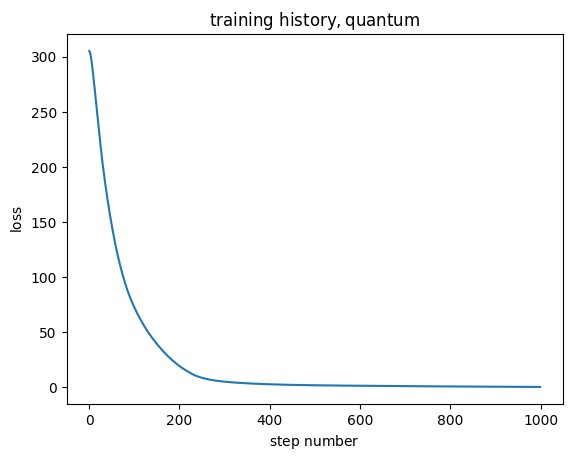

In [ ]:
%time
start_time = time.time()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss}$')
title = ax.set_title(r'${\rm training\ history, quantum}$')
epoch_time = time.time() - start_time
print(epoch_time)

In [ ]:
train_accuracy

[Array(0.4864155, dtype=float32),
 Array(0.4864155, dtype=float32),
 Array(0.48633343, dtype=float32),
 Array(0.48625135, dtype=float32),
 Array(0.46991712, dtype=float32),
 Array(0.46696216, dtype=float32),
 Array(0.46433556, dtype=float32),
 Array(0.46080604, dtype=float32),
 Array(0.4588361, dtype=float32),
 Array(0.45694822, dtype=float32),
 Array(0.45489618, dtype=float32),
 Array(0.45317248, dtype=float32),
 Array(0.45161292, dtype=float32),
 Array(0.4498892, dtype=float32),
 Array(0.44693425, dtype=float32),
 Array(0.44512847, dtype=float32),
 Array(0.44299436, dtype=float32),
 Array(0.4418452, dtype=float32),
 Array(0.43938276, dtype=float32),
 Array(0.4374128, dtype=float32),
 Array(0.4356891, dtype=float32),
 Array(0.43314457, dtype=float32),
 Array(0.43002546, dtype=float32),
 Array(0.42772716, dtype=float32),
 Array(0.42592138, dtype=float32),
 Array(0.42329475, dtype=float32),
 Array(0.42066815, dtype=float32),
 Array(0.41705656, dtype=float32),
 Array(0.41369122, dtype=fl

In [ ]:
test_accuracy[-1]

Array(0.83081573, dtype=float32)

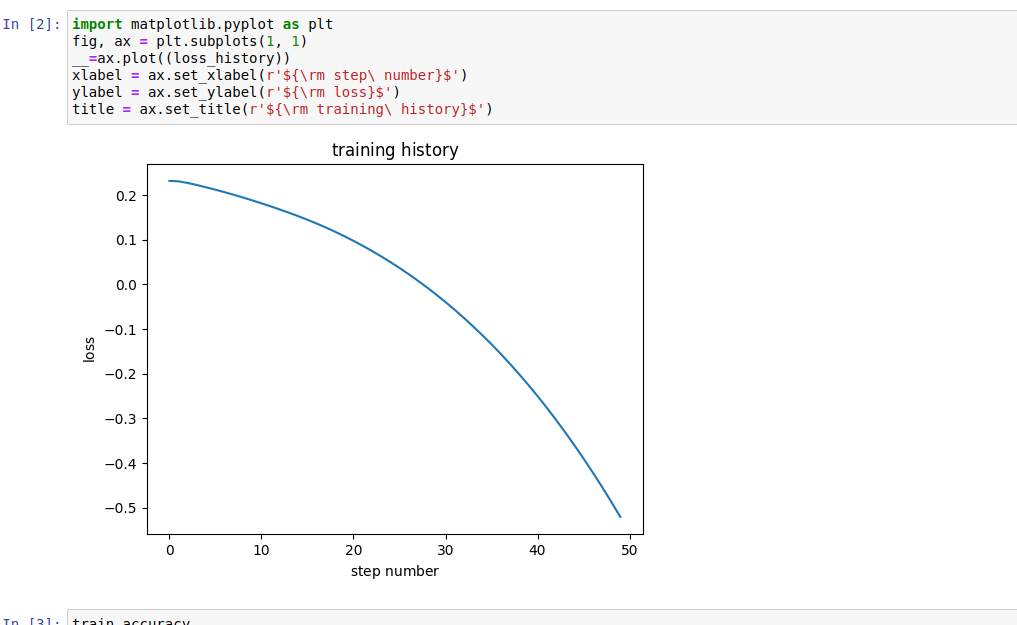
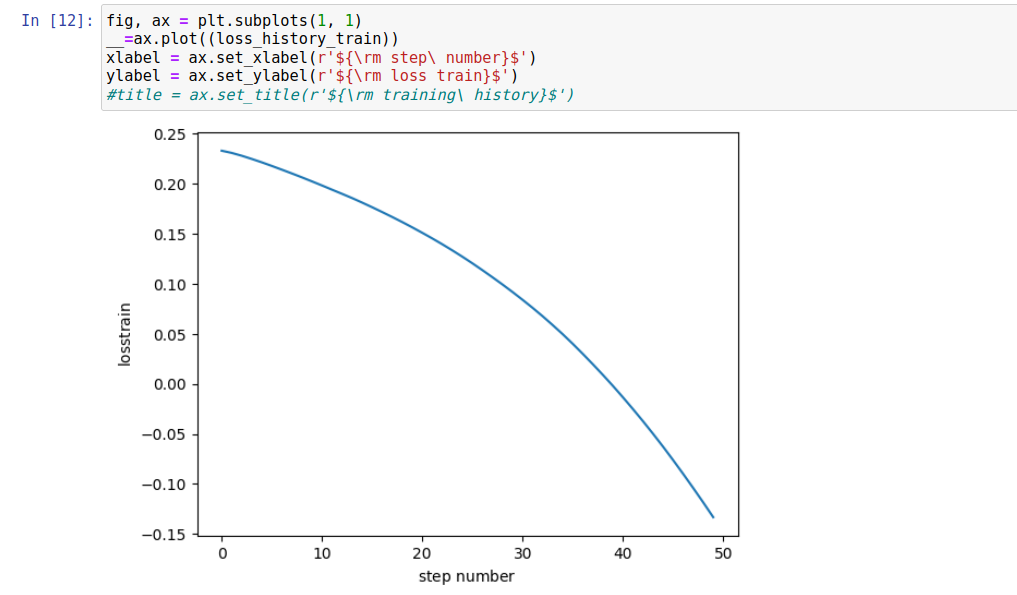
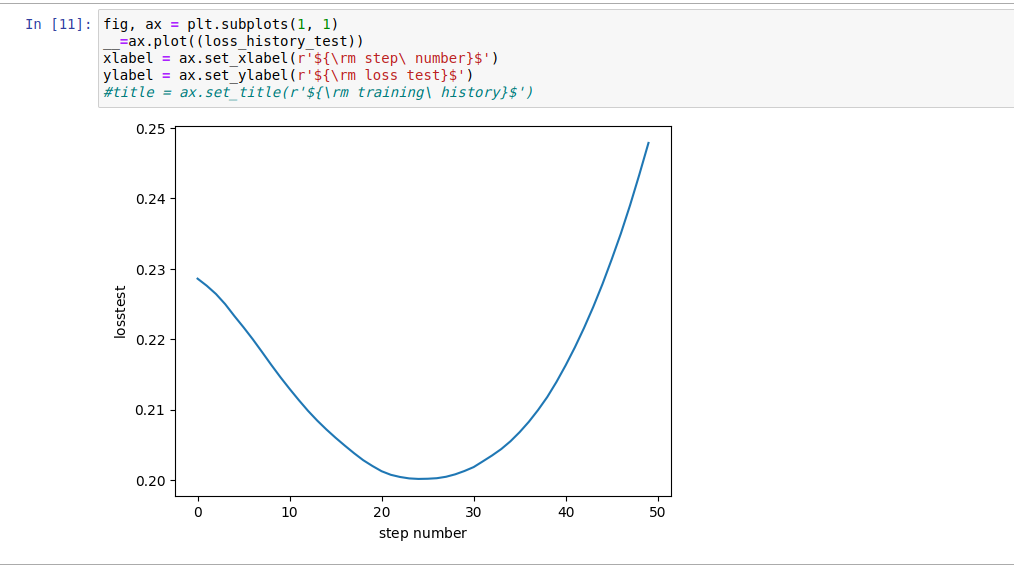
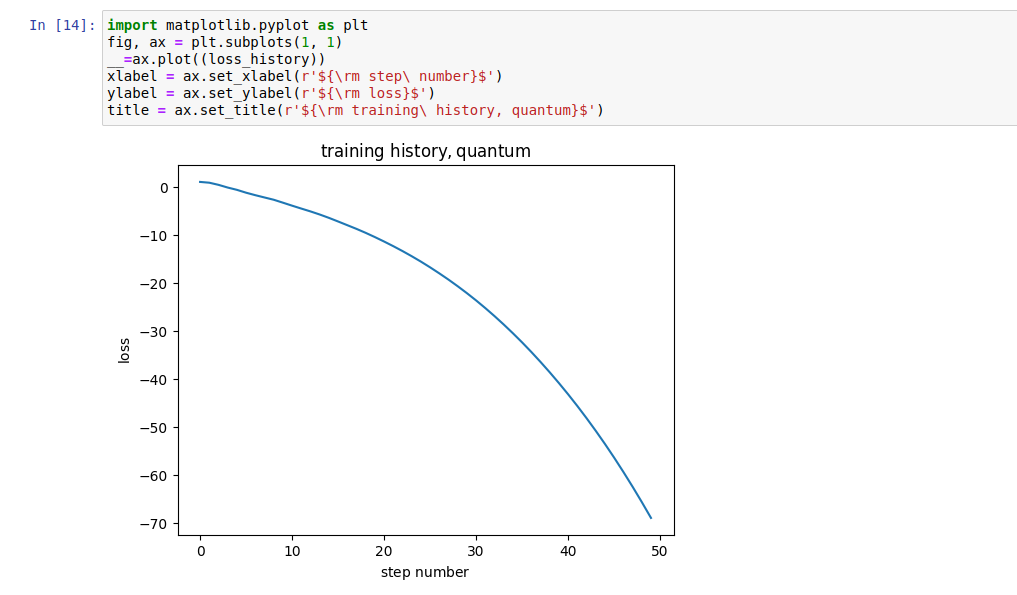
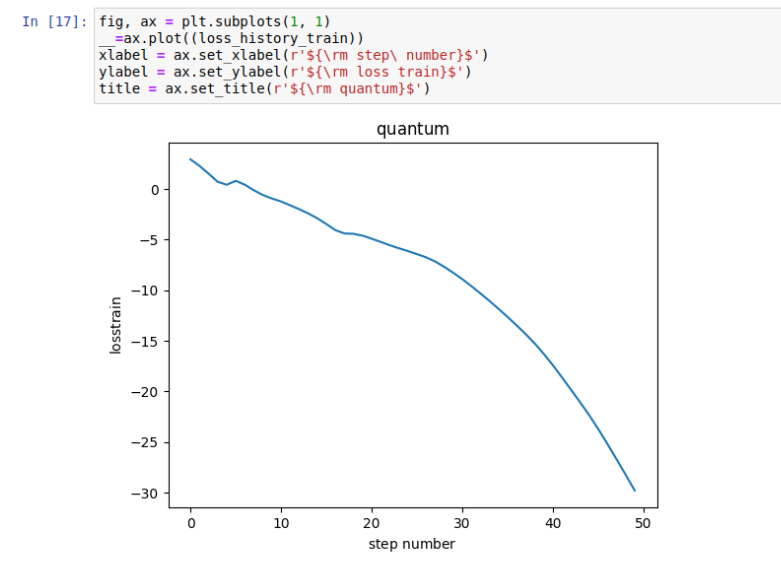
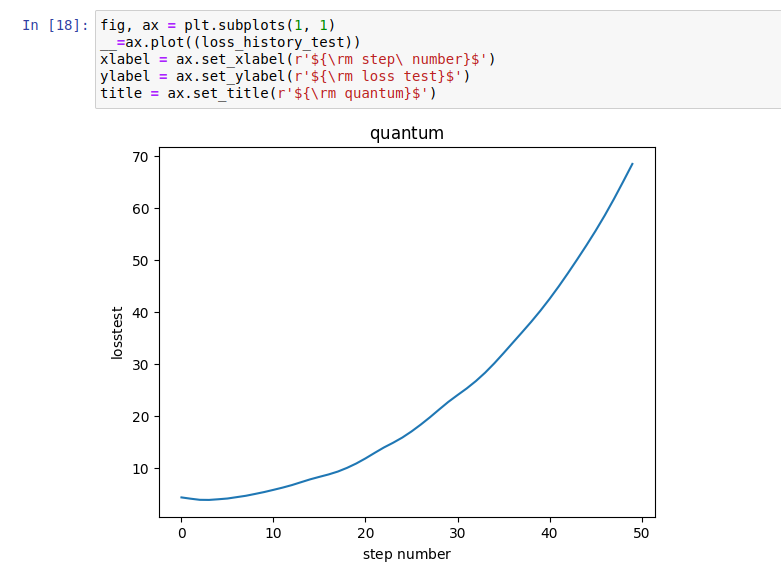

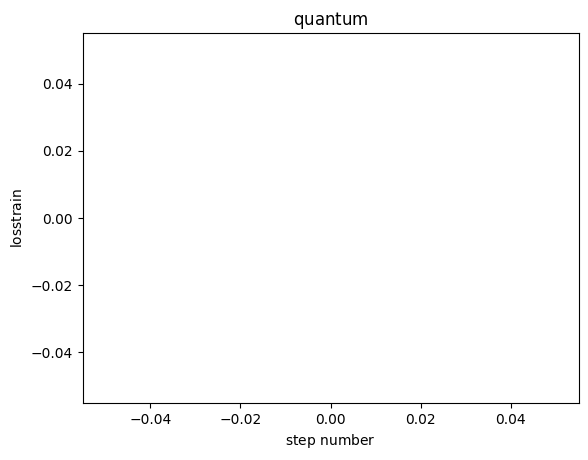

In [ ]:
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history_train))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss train}$')
title = ax.set_title(r'${\rm quantum}$')

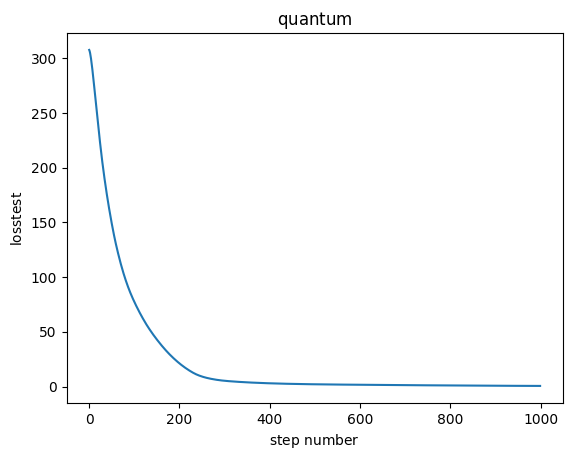

In [ ]:
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history_test))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss test}$')
title = ax.set_title(r'${\rm quantum}$')

In [ ]:
theta = jnp.asarray(90*np.random.random((3,6)), dtype = int)
theta1 = np.random.randint(90, size=(1, 6))
print(theta, theta1)

[[42 26 83 56 52 54]
 [76 83 38 86 35 65]
 [44 40 12 31 44  8]] [[31 88 41 62 73  7]]


In [ ]:
import jax.numpy as jnp
from qhollab import *
from quantum import *

In [ ]:
num_quantum =1
image = jnp.ones(6)
theta14 = jnp.asarray(0.1*np.random.random((num_quantum, 24)))
circ = Circuit_14(theta14[0])
Pooling_q(circ)

NameError: name 'Circuit_14' is not defined

In [ ]:
theta = jnp.asarray(0.1*np.random.random((num_quantum, 8)))
theta_small = jnp.asarray(0.1*np.random.random((num_quantum, 4)))
circ = Сircuit_9(theta[0], img)
circ = Pooling_q(circ)
circ *= Сircuit_9(theta_small[0], img/2)

In [ ]:
img = SV(np.random.rand(1,2,2,2,2,2,2,2,2))
res = simulate(circ, img).data
res.reshape(1,8)

In [ ]:
circ_ = Сircuit_9(theta[0])*Measurement(0)*Measurement(1)*Measurement(2)*Measurement(3)*Measurement(4)*Measurement(5)
res_ = simulate(circ_, img).data

In [ ]:
res_.reshape(8,8)

In [ ]:
circ

In [ ]:
Сircuit_9(theta[0], img)

In [ ]:
len(img.data_shape)


In [ ]:
Сircuit_9(theta_small[0], Pooling_q(img))

In [ ]:
Pooling_q(Сircuit_9(theta[0]))

In [ ]:
a = np.random.rand(234)

In [ ]:
print(f'{a:0.2f}')

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
__=ax.plot((a))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss}$')
title = ax.set_title(r'${\rm training\ history, quantum}$')
fig.savefig('test.pdf')